In [13]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pylab as plt
import seaborn as sns

In [14]:
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

In [18]:
from statsmodels.tsa import tsatools 
from dmba import regressionSummary

In [23]:
!pip install chinesecalendar

from chinese_calendar import is_workday, is_holiday

In [24]:
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [25]:
from datetime import date, datetime

In [26]:
from scipy.stats import linregress
from scipy.stats.mstats import zscore
from sklearn import preprocessing
from scipy import stats

In [49]:
plat_df = pd.read_csv("./data/DATA_threesources.csv")

In [50]:
plat_df.head()

,Date,Search AD,Membership,Direct Volumn,Search Volumn,Referral Volumn,Number of Ads,Display AD,Seller Community,State
0,10/1/10,611911.04,3164.0,254742.0,925349.0,532800.0,57.0,910262.0,8621.0,0.0
1,10/2/10,304285.14,4367.0,320438.0,1182742.0,683447.0,57.0,910262.0,160992.0,0.0
2,10/3/10,314934.69,5693.0,298304.0,1201440.0,672891.0,57.0,910262.0,4256748.0,0.0
3,10/4/10,735275.26,7634.0,1212023.0,1321080.0,1036487.0,57.0,910262.0,286411.0,0.0
4,10/5/10,773972.96,7861.0,1235900.0,1412837.0,1100739.0,57.0,910262.0,2762952.0,0.0


In [51]:
plat_df.shape

(636, 10)

/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


{'whiskers': [<matplotlib.lines.Line2D at 0x7f80985b6d10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f80985b6910>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f80985b6d50>],
 'medians': [<matplotlib.lines.Line2D at 0x7f80985c7d10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f80985c2e50>],
 'means': []}

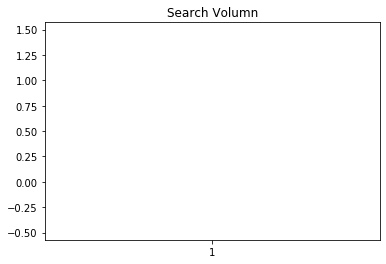

In [53]:
fig1, ax1 = plt.subplots()
ax1.set_title('Search Volumn')
ax1.boxplot(plat_df["Search Volumn"])

In [54]:
plat_df.columns = [s.replace(' ', '_') for s in plat_df.columns] 
print (plat_df.columns)

Index(['Date', 'Search_AD', 'Membership', 'Direct_Volumn', 'Search_Volumn',
       'Referral_Volumn', 'Number_of_Ads', 'Display_AD', 'Seller_Community',
       'State'],
      dtype='object')


In [55]:
upper = plat_df["Search_Volumn"].mean() + 2 * plat_df["Search_Volumn"].std()
print (upper)

1825042.3573243301


In [56]:
plat_big_search = plat_df[(plat_df.Date == "4/20/11") | (plat_df.Date == "5/7/11") | (plat_df.Date=="5/8/11") | (plat_df.Date =="5/9/11") | (plat_df.Date =="5/10/11") | (plat_df.Date =="5/11/11")]
plat_big_search

,Date,Search_AD,Membership,Direct_Volumn,Search_Volumn,Referral_Volumn,Number_of_Ads,Display_AD,Seller_Community,State
201,4/20/11,1093842.84,16711.0,680395.0,1115222.0,6748056.0,9.0,367180.0,82027.0,1.0
218,5/7/11,829213.08,14071.0,353657.0,834552.0,3490030.0,34.0,630830.0,157418.0,1.0
219,5/8/11,643316.75,13585.0,350706.0,753771.0,4921050.0,23.0,1260280.0,23791.0,1.0
220,5/9/11,1099006.52,17202.0,755042.0,1110296.0,5398575.0,23.0,1260280.0,23464.0,1.0
221,5/10/11,1140354.40,17279.0,746558.0,1099321.0,5732934.0,71.0,1225240.0,25188.0,1.0
222,5/11/11,1152678.39,17160.0,750539.0,1094420.0,3022149.0,22.0,360360.0,0.0,1.0


In [57]:
plat_before = plat_df[(plat_df.Date == "4/20/11") | (plat_df.Date == "5/7/11") | (plat_df.Date=="5/8/11") | (plat_df.Date =="5/9/11") | (plat_df.Date =="5/10/11") | (plat_df.Date =="5/11/11")]
plat_before

,Date,Search_AD,Membership,Direct_Volumn,Search_Volumn,Referral_Volumn,Number_of_Ads,Display_AD,Seller_Community,State
201,4/20/11,1093842.84,16711.0,680395.0,1115222.0,6748056.0,9.0,367180.0,82027.0,1.0
218,5/7/11,829213.08,14071.0,353657.0,834552.0,3490030.0,34.0,630830.0,157418.0,1.0
219,5/8/11,643316.75,13585.0,350706.0,753771.0,4921050.0,23.0,1260280.0,23791.0,1.0
220,5/9/11,1099006.52,17202.0,755042.0,1110296.0,5398575.0,23.0,1260280.0,23464.0,1.0
221,5/10/11,1140354.40,17279.0,746558.0,1099321.0,5732934.0,71.0,1225240.0,25188.0,1.0
222,5/11/11,1152678.39,17160.0,750539.0,1094420.0,3022149.0,22.0,360360.0,0.0,1.0


In [58]:
plat_df.at[201, "Search_AD"] = upper
plat_df.at[218, "Search_AD"] = upper
plat_df.at[219, "Search_AD"] = upper
plat_df.at[220, "Search_AD"] = upper
plat_df.at[221, "Search_AD"] = upper
plat_df.at[222, "Search_AD"] = upper

In [59]:
plat_after = plat_df[(plat_df.Date == "4/20/11") | (plat_df.Date == "5/7/11") | (plat_df.Date=="5/8/11") | (plat_df.Date =="5/9/11") | (plat_df.Date =="5/10/11") | (plat_df.Date =="5/11/11")]
plat_after

,Date,Search_AD,Membership,Direct_Volumn,Search_Volumn,Referral_Volumn,Number_of_Ads,Display_AD,Seller_Community,State
201,4/20/11,1.825042e+06,16711.0,680395.0,1115222.0,6748056.0,9.0,367180.0,82027.0,1.0
218,5/7/11,1.825042e+06,14071.0,353657.0,834552.0,3490030.0,34.0,630830.0,157418.0,1.0
219,5/8/11,1.825042e+06,13585.0,350706.0,753771.0,4921050.0,23.0,1260280.0,23791.0,1.0
220,5/9/11,1.825042e+06,17202.0,755042.0,1110296.0,5398575.0,23.0,1260280.0,23464.0,1.0
221,5/10/11,1.825042e+06,17279.0,746558.0,1099321.0,5732934.0,71.0,1225240.0,25188.0,1.0
222,5/11/11,1.825042e+06,17160.0,750539.0,1094420.0,3022149.0,22.0,360360.0,0.0,1.0


In [60]:
plat_df["Direct_Volumn"] = plat_df["Direct_Volumn"].astype("float")
plat_df["State"] = plat_df["State"].astype("category")

In [61]:
plat_df.dtypes

Date                  object
Search_AD            float64
Membership           float64
Direct_Volumn        float64
Search_Volumn        float64
Referral_Volumn      float64
Number_of_Ads        float64
Display_AD           float64
Seller_Community     float64
State               category
dtype: object

# add columns

In [78]:
Y = 2000 # dummy leap year to allow input X-02-29 (leap day)
seasons = [('Winter', (date(Y,  1,  1),  date(Y,  3, 20))),
           ('Spring', (date(Y,  3, 21),  date(Y,  6, 20))),
           ('Summer', (date(Y,  6, 21),  date(Y,  9, 22))),
           ('Autumn', (date(Y,  9, 23),  date(Y, 12, 20))),
           ('Winter', (date(Y, 12, 21),  date(Y, 12, 31)))]
 
def get_season(df, index):
    now = datetime.strptime(str(df['Date'][index]), '%y-%m-%d %H:%M:%S')
    if isinstance(now, datetime):
        now = now.date()
    now = now.replace(year=Y)
    return next(season for season, (start, end) in seasons
                if start <= now <= end)
 
seasons = [get_season(plat_df, index) for index in plat_df.index]
 
plat_df['Season'] = pd.Series(seasons, index=plat_df.index)

ValueError: time data '2010-10-01 00:00:00' does not match format '%y-%m-%d %H:%M:%S'

In [67]:
# revenue from membership = # of new sellers * around USD 3,000/year
plat_df["Membership_Fee"] = plat_df["Membership"] * 3000
# add day of the date
plat_df['Day'] = pd.to_datetime(plat_df['Date']).dt.day_name()
# total revenue
plat_df['Revenue'] = plat_df["Membership_Fee"] + plat_df["Search_AD"] + plat_df["Display_AD"]
# customer volumn
plat_df['Volumn'] = plat_df["Direct_Volumn"] + plat_df["Search_Volumn"] + plat_df["Referral_Volumn"]
#df['Date'].apply(is_workday, axis=0)
#df["Date"][2].is_workday()
plat_df["Date"] = plat_df["Date"].astype("datetime64[ns]")
plat_df["Holiday"] = [is_holiday(x) for x in plat_df["Date"]]

NotImplementedError: no available data for year nan, only year between [2004, 2020] supported

In [64]:
plat_df.head()

,Date,Search_AD,Membership,Direct_Volumn,Search_Volumn,Referral_Volumn,Number_of_Ads,Display_AD,Seller_Community,State
0,10/1/10,611911.04,3164.0,254742.0,925349.0,532800.0,57.0,910262.0,8621.0,0.0
1,10/2/10,304285.14,4367.0,320438.0,1182742.0,683447.0,57.0,910262.0,160992.0,0.0
2,10/3/10,314934.69,5693.0,298304.0,1201440.0,672891.0,57.0,910262.0,4256748.0,0.0
3,10/4/10,735275.26,7634.0,1212023.0,1321080.0,1036487.0,57.0,910262.0,286411.0,0.0
4,10/5/10,773972.96,7861.0,1235900.0,1412837.0,1100739.0,57.0,910262.0,2762952.0,0.0


In [65]:
plat_df_0 = plat_df.loc[plat_df['State'] ==0]
plat_df_0.head()

,Date,Search_AD,Membership,Direct_Volumn,Search_Volumn,Referral_Volumn,Number_of_Ads,Display_AD,Seller_Community,State
0,10/1/10,611911.04,3164.0,254742.0,925349.0,532800.0,57.0,910262.0,8621.0,0.0
1,10/2/10,304285.14,4367.0,320438.0,1182742.0,683447.0,57.0,910262.0,160992.0,0.0
2,10/3/10,314934.69,5693.0,298304.0,1201440.0,672891.0,57.0,910262.0,4256748.0,0.0
3,10/4/10,735275.26,7634.0,1212023.0,1321080.0,1036487.0,57.0,910262.0,286411.0,0.0
4,10/5/10,773972.96,7861.0,1235900.0,1412837.0,1100739.0,57.0,910262.0,2762952.0,0.0


In [24]:
plat_df_1 = plat_df.loc[plat_df['State'] == 1]
plat_df_1.head()

,Date,Search_AD,Membership,Direct_Volumn,Search_Volumn,Referral_Volumn,Number_of_Ads,Display_AD,Seller_Community,State,Season,Membership_Fee,Day,Revenue,Volumn,Holiday
151,2011-03-01,1038382.54,12744.0,1155457.0,1111527.0,1415348.0,13,220912.0,150683,1,Winter,38232000.0,Tuesday,39491294.54,3682332.0,False
152,2011-03-02,1034441.34,12634.0,1135552.0,1092357.0,1372496.0,37,618960.0,4085437,1,Winter,37902000.0,Wednesday,39555401.34,3600405.0,False
153,2011-03-03,1047495.09,12464.0,1087455.0,1089910.0,1214663.0,47,874574.0,308611,1,Winter,37392000.0,Thursday,39314069.09,3392028.0,False
154,2011-03-04,1040088.46,11860.0,1014076.0,1079602.0,1233782.0,85,1421902.0,2155664,1,Winter,35580000.0,Friday,38041990.46,3327460.0,False
155,2011-03-05,579051.17,10996.0,142349.0,874988.0,1052213.0,85,1421902.0,178194,1,Winter,32988000.0,Saturday,34988953.17,2069550.0,True


In [25]:
plat_df.dtypes

Date                datetime64[ns]
Search_AD                  float64
Membership                 float64
Direct_Volumn              float64
Search_Volumn              float64
Referral_Volumn            float64
Number_of_Ads                int64
Display_AD                 float64
Seller_Community             int64
State                     category
Season                      object
Membership_Fee             float64
Day                         object
Revenue                    float64
Volumn                     float64
Holiday                       bool
dtype: object

In [26]:
plat_df["Holiday"] = plat_df["Holiday"].astype("category")

In [27]:
plat_df.dtypes

Date                datetime64[ns]
Search_AD                  float64
Membership                 float64
Direct_Volumn              float64
Search_Volumn              float64
Referral_Volumn            float64
Number_of_Ads                int64
Display_AD                 float64
Seller_Community             int64
State                     category
Season                      object
Membership_Fee             float64
Day                         object
Revenue                    float64
Volumn                     float64
Holiday                   category
dtype: object

In [28]:
plat_df_dum = pd.get_dummies(plat_df, prefix_sep='_', drop_first=True) 
print(plat_df_dum.columns)

Index(['Date', 'Search_AD', 'Membership', 'Direct_Volumn', 'Search_Volumn',
       'Referral_Volumn', 'Number_of_Ads', 'Display_AD', 'Seller_Community',
       'Membership_Fee', 'Revenue', 'Volumn', 'State_1', 'Season_Spring',
       'Season_Summer', 'Season_Winter', 'Day_Monday', 'Day_Saturday',
       'Day_Sunday', 'Day_Thursday', 'Day_Tuesday', 'Day_Wednesday',
       'Holiday_True'],
      dtype='object')


In [29]:
plat_df_dum.head()

,Date,Search_AD,Membership,Direct_Volumn,Search_Volumn,Referral_Volumn,Number_of_Ads,Display_AD,Seller_Community,Membership_Fee,...,Season_Spring,Season_Summer,Season_Winter,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Holiday_True
0,2010-10-01,611911.04,3164.0,254742.0,925349.0,532800.0,57,910262.0,8621,9492000.0,...,0,0,0,0,0,0,0,0,0,1
1,2010-10-02,304285.14,4367.0,320438.0,1182742.0,683447.0,57,910262.0,160992,13101000.0,...,0,0,0,0,1,0,0,0,0,1
2,2010-10-03,314934.69,5693.0,298304.0,1201440.0,672891.0,57,910262.0,4256748,17079000.0,...,0,0,0,0,0,1,0,0,0,1
3,2010-10-04,735275.26,7634.0,1212023.0,1321080.0,1036487.0,57,910262.0,286411,22902000.0,...,0,0,0,1,0,0,0,0,0,1
4,2010-10-05,773972.96,7861.0,1235900.0,1412837.0,1100739.0,57,910262.0,2762952,23583000.0,...,0,0,0,0,0,0,0,1,0,1


In [30]:
seller = ["Search_AD", "Display_AD", "Membership_Fee"]
buyer = ["Direct_Volumn", "Search_Volumn", "Referral_Volumn"]
control = ["Seller_Community", "Number_of_Ads", "State_1", 'Season_Spring',
       'Season_Summer', 'Season_Winter', 'Holiday_True']
total = ["Revenue", "Volumn"]

# What we care about

## observe the trend, structure (which part is more/less), relationships among variables
## identify hypothesis
### change structure to less membership fee
### Increase Direct_volumn (loyalty)

# before & after mobile

In [66]:
#for plat_df_0
labels = 'Membership Fee', 'Search AD', 'Display AD'
sizes = [plat_df_0["Membership_Fee"].sum(), plat_df_0["Search_AD"].sum(), plat_df_0["Display_AD"].sum()]
explode = (0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(16,12))
ax1.pie(sizes, explode=explode, labels=None, autopct='%1.1f%%',
        shadow=True, startangle=90,textprops={'fontsize': 14})
plt.legend(labels=['Membership Fee', 'Search AD', 'Display AD'])
plt.tight_layout()
plt.show()

KeyError: 'Membership_Fee'

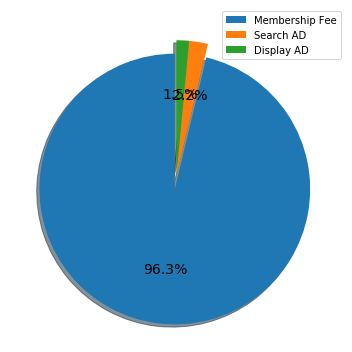

In [32]:
#for plat_df_1
labels = 'Membership Fee', 'Search AD', 'Display AD'
sizes = [plat_df_1["Membership_Fee"].sum(), plat_df_1["Search_AD"].sum(), plat_df_1["Display_AD"].sum()]
explode = (0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, explode=explode, labels=None, autopct='%1.1f%%',
        shadow=True, startangle=90,textprops={'fontsize': 14})
plt.legend(labels=['Membership Fee', 'Search AD', 'Display AD'])
plt.tight_layout()
plt.show()

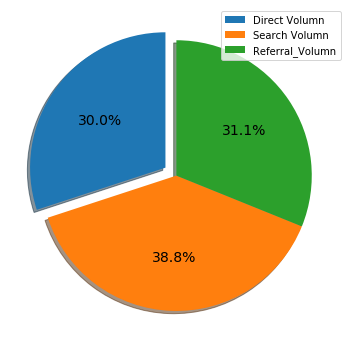

In [33]:
#for plat_df_0
labels = 'Direct Volumn', 'Search Volumn', 'Referral_Volumn'
sizes = [plat_df_0["Direct_Volumn"].sum(), plat_df_0["Search_Volumn"].sum(), plat_df_0["Referral_Volumn"].sum()]
explode = (0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, explode=explode, labels=None, autopct='%1.1f%%',
        shadow=True, startangle=90,textprops={'fontsize': 14})
plt.legend(labels=['Direct Volumn', 'Search Volumn', 'Referral_Volumn'])
plt.tight_layout()
plt.show()

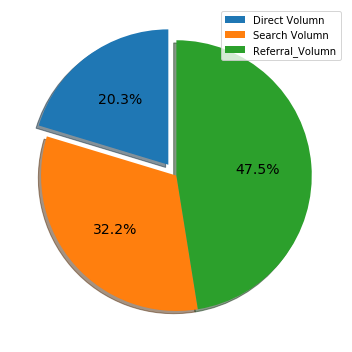

In [34]:
#for plat_df_1
labels = 'Direct Volumn', 'Search Volumn', 'Referral_Volumn'
sizes = [plat_df_1["Direct_Volumn"].sum(), plat_df_1["Search_Volumn"].sum(), plat_df_1["Referral_Volumn"].sum()]
explode = (0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, explode=explode, labels=None, autopct='%1.1f%%',
        shadow=True, startangle=90,textprops={'fontsize': 14})
plt.legend(labels=['Direct Volumn', 'Search Volumn', 'Referral_Volumn'])
plt.tight_layout()
plt.show()

# Regression - check multicolinearity

In [35]:
features = "+".join(seller + control + buyer)
y, X = dmatrices('Volumn ~' + features, plat_df_dum, return_type='dataframe')

In [36]:
features

'Search_AD+Display_AD+Membership_Fee+Seller_Community+Number_of_Ads+State_1+Season_Spring+Season_Summer+Season_Winter+Holiday_True+Direct_Volumn+Search_Volumn+Referral_Volumn'

In [37]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [38]:
vif.round(1)

,VIF Factor,features
0,142.7,Intercept
1,9.3,Search_AD
2,15.5,Display_AD
3,3.9,Membership_Fee
4,1.1,Seller_Community
5,16.4,Number_of_Ads
6,7.8,State_1
7,11.4,Season_Spring
8,13.5,Season_Summer
9,6.7,Season_Winter


# Regression

In [39]:
plat_df_dum.columns

Index(['Date', 'Search_AD', 'Membership', 'Direct_Volumn', 'Search_Volumn',
       'Referral_Volumn', 'Number_of_Ads', 'Display_AD', 'Seller_Community',
       'Membership_Fee', 'Revenue', 'Volumn', 'State_1', 'Season_Spring',
       'Season_Summer', 'Season_Winter', 'Day_Monday', 'Day_Saturday',
       'Day_Sunday', 'Day_Thursday', 'Day_Tuesday', 'Day_Wednesday',
       'Holiday_True'],
      dtype='object')

def getrsqr(predictors, outcome):
    X = plat_df_dum[predictors]
    #std_X = preprocessing.scale(X)
    y = plat_df_dum[outcome]
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.4, random_state =1) 
    plat_lm = LinearRegression(normalize = True)
    plat_lm.fit(train_X, train_y)
    plat_lm_pred = plat_lm.predict(train_X) 
    all_residuals = train_y - plat_lm_pred
    print (type(train_X))
    train_df = train_X.join(train_y)
    formula = outcome + ' ~ ' + ' + '.join(predictors) 
    plat_lm = smf.ols(formula=formula, data=train_df).fit() 
    print(plat_lm.summary())


#predictors = ["Search_AD", "Display_AD"] + buyer + control
#outcome = "Membership_Fee"
#getrsqr(predictors, outcome)

## regression - membership_fee

In [40]:
df_z = plat_df_dum.select_dtypes(include=[np.number]).apply(stats.zscore)

# fitting regression
#predictors = ["Search_AD", "Display_AD"] + buyer + control
predictors = buyer + control
outcome = "Membership_Fee"
formula = outcome + ' ~ ' + ' + '.join(predictors)
result = smf.ols(formula, data=df_z).fit()

# checking results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Membership_Fee   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     86.54
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           5.67e-88
Time:                        10:40:30   Log-Likelihood:                -284.04
No. Observations:                 358   AIC:                             590.1
Df Residuals:                     347   BIC:                             632.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         7.633e-17      0.029   2.66e-15      1.000      -0.056       0.056
Direct_Volumn        0.0894      0.049      1.834      0.068      -0.006       0.185
Search_Volumn        0.7111      0.072      9.844      0.000       0.569       0.853
Referral_Volumn      0.1148      0.035      3.253      0.001       0.045       0.184
Seller_Community    -0.0267      0.030     -0.887      0.375      -0.086       0.032
Number_of_Ads       -0.0545      0.031     -1.751      0.081      -0.116       0.007
State_1              0.5923      0.073      8.138      0.000       0.449       0.735
Season_Spring        0.4083      0.093      4.375      0.000       0.225       0.592
Season_Summer        0.4544      0.099      4.606      0.000       0.260       0.648
Season_Winter        0.2991      0.073      4.118      0.000       0.156       0.442
Holiday_True        -0.0310      0.046     -0.672      0.502      -0.122       0.060
==============================================================================
Omnibus:                       13.987   Durbin-Watson:                   0.384
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               23.981
Skew:                           0.234   Prob(JB):                     6.20e-06
Kurtosis:                       4.179   Cond. No.                         9.38
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
# not Holiday_True
predictors.remove("Holiday_True")
formula = outcome + ' ~ ' + ' + '.join(predictors)
result = smf.ols(formula, data=df_z).fit()

# checking results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Membership_Fee   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     96.26
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           7.02e-89
Time:                        10:40:30   Log-Likelihood:                -284.28
No. Observations:                 358   AIC:                             588.6
Df Residuals:                     348   BIC:                             627.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         7.633e-17      0.029   2.66e-15      1.000      -0.056       0.056
Direct_Volumn        0.1049      0.043      2.448      0.015       0.021       0.189
Search_Volumn        0.7329      0.064     11.368      0.000       0.606       0.860
Referral_Volumn      0.1170      0.035      3.331      0.001       0.048       0.186
Seller_Community    -0.0270      0.030     -0.899      0.369      -0.086       0.032
Number_of_Ads       -0.0555      0.031     -1.787      0.075      -0.117       0.006
State_1              0.5961      0.073      8.222      0.000       0.454       0.739
Season_Spring        0.4282      0.088      4.841      0.000       0.254       0.602
Season_Summer        0.4794      0.091      5.249      0.000       0.300       0.659
Season_Winter        0.3196      0.066      4.851      0.000       0.190       0.449
==============================================================================
Omnibus:                       15.920   Durbin-Watson:                   0.391
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.466
Skew:                           0.274   Prob(JB):                     1.09e-06
Kurtosis:                       4.241   Cond. No.                         8.66
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
# not Seller_Community
predictors.remove("Seller_Community")
formula = outcome + ' ~ ' + ' + '.join(predictors)
result = smf.ols(formula, data=df_z).fit()

# checking results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Membership_Fee   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     108.2
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           9.74e-90
Time:                        10:40:30   Log-Likelihood:                -284.69
No. Observations:                 358   AIC:                             587.4
Df Residuals:                     349   BIC:                             622.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        7.633e-17      0.029   2.66e-15      1.000      -0.056       0.056
Direct_Volumn       0.1062      0.043      2.479      0.014       0.022       0.190
Search_Volumn       0.7286      0.064     11.336      0.000       0.602       0.855
Referral_Volumn     0.1200      0.035      3.432      0.001       0.051       0.189
Number_of_Ads      -0.0529      0.031     -1.711      0.088      -0.114       0.008
State_1             0.5932      0.072      8.192      0.000       0.451       0.736
Season_Spring       0.4280      0.088      4.840      0.000       0.254       0.602
Season_Summer       0.4874      0.091      5.364      0.000       0.309       0.666
Season_Winter       0.3190      0.066      4.844      0.000       0.189       0.449
==============================================================================
Omnibus:                       16.609   Durbin-Watson:                   0.385
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.532
Skew:                           0.290   Prob(JB):                     6.37e-07
Kurtosis:                       4.255   Cond. No.                         8.60
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# not Number_of_Ads
predictors.remove("Number_of_Ads")
formula = outcome + ' ~ ' + ' + '.join(predictors)
result = smf.ols(formula, data=df_z).fit()

# checking results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Membership_Fee   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     122.6
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           3.60e-90
Time:                        10:40:30   Log-Likelihood:                -286.19
No. Observations:                 358   AIC:                             588.4
Df Residuals:                     350   BIC:                             619.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        7.633e-17      0.029   2.65e-15      1.000      -0.057       0.057
Direct_Volumn       0.1118      0.043      2.611      0.009       0.028       0.196
Search_Volumn       0.7110      0.064     11.176      0.000       0.586       0.836
Referral_Volumn     0.1227      0.035      3.506      0.001       0.054       0.192
State_1             0.5654      0.071      7.991      0.000       0.426       0.705
Season_Spring       0.4488      0.088      5.109      0.000       0.276       0.621
Season_Summer       0.5131      0.090      5.711      0.000       0.336       0.690
Season_Winter       0.3145      0.066      4.766      0.000       0.185       0.444
==============================================================================
Omnibus:                       20.506   Durbin-Watson:                   0.373
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.565
Skew:                           0.372   Prob(JB):                     3.12e-08
Kurtosis:                       4.328   Cond. No.                         8.49
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### membership_fee influenced most by Search_Volumn

In [44]:
plat_df_dum["Membership_Fee_Perc"] = plat_df_dum["Membership_Fee"] / (plat_df_dum["Membership_Fee"]+plat_df_dum["Search_AD"]+plat_df_dum["Display_AD"])

In [45]:
df_z = plat_df_dum.select_dtypes(include=[np.number]).apply(stats.zscore)

# fitting regression
predictors = ["Search_AD", "Display_AD"] + buyer + control
predictors = buyer + control
outcome = "Membership_Fee_Perc"
formula = outcome + ' ~ ' + ' + '.join(predictors)
result = smf.ols(formula, data=df_z).fit()

# checking results
result.summary()

# very low adj.R-squared for both predictors

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Membership_Fee_Perc   R-squared:                       0.364
Model:                             OLS   Adj. R-squared:                  0.346
Method:                  Least Squares   F-statistic:                     19.85
Date:                 Sun, 01 Mar 2020   Prob (F-statistic):           6.06e-29
Time:                         10:40:30   Log-Likelihood:                -427.02
No. Observations:                  358   AIC:                             876.0
Df Residuals:                      347   BIC:                             918.7
Df Model:                           10                                         
Covariance Type:             nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -2.593e-16      0.043  -6.06e-15      1.000      -0.084       0.084
Direct_Volumn        0.0563      0.073      0.774      0.439      -0.087       0.199
Search_Volumn        1.0127      0.108      9.403      0.000       0.801       1.225
Referral_Volumn     -0.0023      0.053     -0.043      0.965      -0.106       0.101
Seller_Community    -0.0177      0.045     -0.395      0.693      -0.106       0.070
Number_of_Ads       -0.1871      0.046     -4.035      0.000      -0.278      -0.096
State_1              0.3862      0.109      3.559      0.000       0.173       0.600
Season_Spring        0.5220      0.139      3.752      0.000       0.248       0.796
Season_Summer        0.6346      0.147      4.315      0.000       0.345       0.924
Season_Winter        0.4980      0.108      4.598      0.000       0.285       0.711
Holiday_True         0.3853      0.069      5.593      0.000       0.250       0.521
==============================================================================
Omnibus:                      339.912   Durbin-Watson:                   0.360
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11261.087
Skew:                          -3.953   Prob(JB):                         0.00
Kurtosis:                      29.314   Cond. No.                         9.38
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## regression - Direct_Volumn

In [46]:
df_z = plat_df_dum.select_dtypes(include=[np.number]).apply(stats.zscore)

# fitting regression
#predictors = ["Search_AD", "Display_AD"] + buyer + control
predictors = seller + control
outcome = "Direct_Volumn"
formula = outcome + ' ~ ' + ' + '.join(predictors)
result = smf.ols(formula, data=df_z).fit()

# checking results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Direct_Volumn   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     98.57
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           4.89e-95
Time:                        10:40:30   Log-Likelihood:                -267.12
No. Observations:                 358   AIC:                             556.2
Df Residuals:                     347   BIC:                             598.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -1.44e-16      0.027  -5.26e-15      1.000      -0.054       0.054
Search_AD            0.5743      0.051     11.211      0.000       0.474       0.675
Display_AD          -0.2870      0.106     -2.707      0.007      -0.495      -0.078
Membership_Fee      -0.0272      0.048     -0.568      0.570      -0.122       0.067
Seller_Community     0.0216      0.029      0.754      0.451      -0.035       0.078
Number_of_Ads        0.2757      0.108      2.546      0.011       0.063       0.489
State_1             -0.4794      0.072     -6.666      0.000      -0.621      -0.338
Season_Spring       -0.1313      0.071     -1.857      0.064      -0.270       0.008
Season_Summer       -0.1902      0.073     -2.608      0.010      -0.334      -0.047
Season_Winter        0.0411      0.040      1.020      0.308      -0.038       0.120
Holiday_True        -0.2242      0.042     -5.320      0.000      -0.307      -0.141
==============================================================================
Omnibus:                       21.629   Durbin-Watson:                   1.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.653
Skew:                          -0.455   Prob(JB):                     2.21e-07
Kurtosis:                       4.107   Cond. No.                         9.95
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
# not Membership_Fee
predictors.remove("Membership_Fee")
formula = outcome + ' ~ ' + ' + '.join(predictors)
result = smf.ols(formula, data=df_z).fit()

# checking results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Direct_Volumn   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     109.7
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           5.32e-96
Time:                        10:40:30   Log-Likelihood:                -267.28
No. Observations:                 358   AIC:                             554.6
Df Residuals:                     348   BIC:                             593.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -1.44e-16      0.027  -5.26e-15      1.000      -0.054       0.054
Search_AD            0.5615      0.046     12.207      0.000       0.471       0.652
Display_AD          -0.2820      0.106     -2.672      0.008      -0.490      -0.074
Seller_Community     0.0214      0.029      0.750      0.454      -0.035       0.078
Number_of_Ads        0.2710      0.108      2.513      0.012       0.059       0.483
State_1             -0.4951      0.066     -7.463      0.000      -0.626      -0.365
Season_Spring       -0.1257      0.070     -1.796      0.073      -0.263       0.012
Season_Summer       -0.1831      0.072     -2.551      0.011      -0.324      -0.042
Season_Winter        0.0482      0.038      1.261      0.208      -0.027       0.123
Holiday_True        -0.2218      0.042     -5.295      0.000      -0.304      -0.139
==============================================================================
Omnibus:                       19.438   Durbin-Watson:                   1.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.712
Skew:                          -0.427   Prob(JB):                     1.58e-06
Kurtosis:                       4.030   Cond. No.                         8.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
# not Seller_Community
predictors.remove("Seller_Community")
formula = outcome + ' ~ ' + ' + '.join(predictors)
result = smf.ols(formula, data=df_z).fit()

# checking results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Direct_Volumn   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     123.5
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           6.12e-97
Time:                        10:40:30   Log-Likelihood:                -267.57
No. Observations:                 358   AIC:                             553.1
Df Residuals:                     349   BIC:                             588.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -1.44e-16      0.027  -5.26e-15      1.000      -0.054       0.054
Search_AD         0.5588      0.046     12.193      0.000       0.469       0.649
Display_AD       -0.2831      0.105     -2.684      0.008      -0.491      -0.076
Number_of_Ads     0.2704      0.108      2.509      0.013       0.058       0.482
State_1          -0.4925      0.066     -7.439      0.000      -0.623      -0.362
Season_Spring    -0.1281      0.070     -1.834      0.067      -0.265       0.009
Season_Summer    -0.1916      0.071     -2.703      0.007      -0.331      -0.052
Season_Winter     0.0458      0.038      1.203      0.230      -0.029       0.121
Holiday_True     -0.2237      0.042     -5.351      0.000      -0.306      -0.141
==============================================================================
Omnibus:                       19.303   Durbin-Watson:                   1.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.526
Skew:                          -0.425   Prob(JB):                     1.74e-06
Kurtosis:                       4.028   Cond. No.                         8.71
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Direct_volumn influenced most by search_AD, display_AD (neg), not related to membership_fee
Num_of_ad, holiday(neg), state_1 (neg) (cannot conclude mobile not good, because of hard time in the second half of the year)

In [49]:
df_z = plat_df_dum.select_dtypes(include=[np.number]).apply(stats.zscore)

# fitting regression
predictors = ["Search_Volumn", "Referral_Volumn"] + seller + control
#predictors = seller + control
outcome = "Direct_Volumn"
formula = outcome + ' ~ ' + ' + '.join(predictors)
result = smf.ols(formula, data=df_z).fit()

# checking results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Direct_Volumn   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     108.3
Date:                Sun, 01 Mar 2020   Prob (F-statistic):          4.57e-109
Time:                        10:40:30   Log-Likelihood:                -228.49
No. Observations:                 358   AIC:                             483.0
Df Residuals:                     345   BIC:                             533.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -1.44e-16      0.025  -5.84e-15      1.000      -0.049       0.049
Search_Volumn        0.1746      0.070      2.499      0.013       0.037       0.312
Referral_Volumn     -0.3527      0.040     -8.750      0.000      -0.432      -0.273
Search_AD            0.8721      0.059     14.837      0.000       0.756       0.988
Display_AD          -0.1480      0.097     -1.527      0.128      -0.339       0.043
Membership_Fee      -0.1055      0.048     -2.194      0.029      -0.200      -0.011
Seller_Community     0.0081      0.026      0.312      0.756      -0.043       0.059
Number_of_Ads        0.1172      0.100      1.177      0.240      -0.079       0.313
State_1             -0.3621      0.066     -5.465      0.000      -0.492      -0.232
Season_Spring       -0.0199      0.083     -0.238      0.812      -0.184       0.144
Season_Summer       -0.1895      0.090     -2.108      0.036      -0.366      -0.013
Season_Winter        0.1345      0.063      2.119      0.035       0.010       0.259
Holiday_True        -0.0743      0.043     -1.730      0.084      -0.159       0.010
==============================================================================
Omnibus:                       14.397   Durbin-Watson:                   1.227
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.891
Skew:                          -0.291   Prob(JB):                     1.76e-05
Kurtosis:                       4.063   Cond. No.                         11.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# not Season_Spring
predictors.remove("Season_Spring")
formula = outcome + ' ~ ' + ' + '.join(predictors)
result = smf.ols(formula, data=df_z).fit()

# checking results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Direct_Volumn   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     118.4
Date:                Sun, 01 Mar 2020   Prob (F-statistic):          4.21e-110
Time:                        10:40:30   Log-Likelihood:                -228.52
No. Observations:                 358   AIC:                             481.0
Df Residuals:                     346   BIC:                             527.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -1.44e-16      0.025  -5.85e-15      1.000      -0.048       0.048
Search_Volumn        0.1853      0.053      3.475      0.001       0.080       0.290
Referral_Volumn     -0.3524      0.040     -8.759      0.000      -0.432      -0.273
Search_AD            0.8702      0.058     14.955      0.000       0.756       0.985
Display_AD          -0.1502      0.096     -1.560      0.120      -0.340       0.039
Membership_Fee      -0.1076      0.047     -2.278      0.023      -0.200      -0.015
Seller_Community     0.0079      0.026      0.307      0.759      -0.043       0.059
Number_of_Ads        0.1200      0.099      1.215      0.225      -0.074       0.314
State_1             -0.3706      0.056     -6.629      0.000      -0.481      -0.261
Season_Summer       -0.1697      0.035     -4.905      0.000      -0.238      -0.102
Season_Winter        0.1462      0.040      3.636      0.000       0.067       0.225
Holiday_True        -0.0720      0.042     -1.724      0.086      -0.154       0.010
==============================================================================
Omnibus:                       14.139   Durbin-Watson:                   1.227
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.492
Skew:                          -0.285   Prob(JB):                     2.15e-05
Kurtosis:                       4.056   Cond. No.                         10.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
# not Seller_Community
predictors.remove("Seller_Community")
formula = outcome + ' ~ ' + ' + '.join(predictors)
result = smf.ols(formula, data=df_z).fit()

# checking results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Direct_Volumn   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     130.6
Date:                Sun, 01 Mar 2020   Prob (F-statistic):          3.76e-111
Time:                        10:40:31   Log-Likelihood:                -228.57
No. Observations:                 358   AIC:                             479.1
Df Residuals:                     347   BIC:                             521.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -1.44e-16      0.025  -5.85e-15      1.000      -0.048       0.048
Search_Volumn       0.1869      0.053      3.526      0.000       0.083       0.291
Referral_Volumn    -0.3528      0.040     -8.786      0.000      -0.432      -0.274
Search_AD           0.8694      0.058     14.976      0.000       0.755       0.984
Display_AD         -0.1501      0.096     -1.561      0.119      -0.339       0.039
Membership_Fee     -0.1080      0.047     -2.291      0.023      -0.201      -0.015
Number_of_Ads       0.1191      0.099      1.208      0.228      -0.075       0.313
State_1            -0.3691      0.056     -6.636      0.000      -0.478      -0.260
Season_Summer      -0.1719      0.034     -5.084      0.000      -0.238      -0.105
Season_Winter       0.1464      0.040      3.646      0.000       0.067       0.225
Holiday_True       -0.0722      0.042     -1.730      0.084      -0.154       0.010
==============================================================================
Omnibus:                       14.218   Durbin-Watson:                   1.227
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.631
Skew:                          -0.287   Prob(JB):                     2.01e-05
Kurtosis:                       4.059   Cond. No.                         10.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# not Number_of_Ads
predictors.remove("Number_of_Ads")
formula = outcome + ' ~ ' + ' + '.join(predictors)
result = smf.ols(formula, data=df_z).fit()

# checking results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Direct_Volumn   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     144.7
Date:                Sun, 01 Mar 2020   Prob (F-statistic):          6.27e-112
Time:                        10:40:31   Log-Likelihood:                -229.32
No. Observations:                 358   AIC:                             478.6
Df Residuals:                     348   BIC:                             517.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -1.44e-16      0.025  -5.85e-15      1.000      -0.048       0.048
Search_Volumn       0.2063      0.051      4.081      0.000       0.107       0.306
Referral_Volumn    -0.3592      0.040     -9.019      0.000      -0.438      -0.281
Search_AD           0.8599      0.058     14.941      0.000       0.747       0.973
Display_AD         -0.0382      0.026     -1.478      0.140      -0.089       0.013
Membership_Fee     -0.1097      0.047     -2.328      0.020      -0.202      -0.017
State_1            -0.3586      0.055     -6.523      0.000      -0.467      -0.250
Season_Summer      -0.1735      0.034     -5.131      0.000      -0.240      -0.107
Season_Winter       0.1545      0.040      3.899      0.000       0.077       0.232
Holiday_True       -0.0724      0.042     -1.736      0.084      -0.155       0.010
==============================================================================
Omnibus:                       12.042   Durbin-Watson:                   1.214
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               17.406
Skew:                          -0.258   Prob(JB):                     0.000166
Kurtosis:                       3.949   Cond. No.                         6.09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# not Display_AD
predictors.remove("Display_AD")
formula = outcome + ' ~ ' + ' + '.join(predictors)
result = smf.ols(formula, data=df_z).fit()

# checking results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Direct_Volumn   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     162.0
Date:                Sun, 01 Mar 2020   Prob (F-statistic):          1.41e-112
Time:                        10:40:31   Log-Likelihood:                -230.44
No. Observations:                 358   AIC:                             478.9
Df Residuals:                     349   BIC:                             513.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -1.44e-16      0.025  -5.84e-15      1.000      -0.048       0.048
Search_Volumn       0.1870      0.049      3.823      0.000       0.091       0.283
Referral_Volumn    -0.3596      0.040     -9.014      0.000      -0.438      -0.281
Search_AD           0.8562      0.058     14.866      0.000       0.743       0.969
Membership_Fee     -0.1020      0.047     -2.174      0.030      -0.194      -0.010
State_1            -0.3767      0.054     -7.020      0.000      -0.482      -0.271
Season_Summer      -0.1708      0.034     -5.050      0.000      -0.237      -0.104
Season_Winter       0.1435      0.039      3.680      0.000       0.067       0.220
Holiday_True       -0.0783      0.042     -1.881      0.061      -0.160       0.004
==============================================================================
Omnibus:                       11.544   Durbin-Watson:                   1.211
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               16.336
Skew:                          -0.254   Prob(JB):                     0.000284
Kurtosis:                       3.915   Cond. No.                         5.91
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
# not Holiday_True
predictors.remove("Holiday_True")
formula = outcome + ' ~ ' + ' + '.join(predictors)
result = smf.ols(formula, data=df_z).fit()

# checking results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Direct_Volumn   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     183.3
Date:                Sun, 01 Mar 2020   Prob (F-statistic):          5.78e-113
Time:                        10:40:31   Log-Likelihood:                -232.24
No. Observations:                 358   AIC:                             480.5
Df Residuals:                     350   BIC:                             511.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -1.44e-16      0.025  -5.82e-15      1.000      -0.049       0.049
Search_Volumn       0.2147      0.047      4.584      0.000       0.123       0.307
Referral_Volumn    -0.3832      0.038    -10.078      0.000      -0.458      -0.308
Search_AD           0.9248      0.045     20.670      0.000       0.837       1.013
Membership_Fee     -0.1066      0.047     -2.266      0.024      -0.199      -0.014
State_1            -0.3636      0.053     -6.809      0.000      -0.469      -0.259
Season_Summer      -0.1697      0.034     -5.000      0.000      -0.236      -0.103
Season_Winter       0.1675      0.037      4.531      0.000       0.095       0.240
==============================================================================
Omnibus:                       22.975   Durbin-Watson:                   1.245
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.600
Skew:                          -0.426   Prob(JB):                     6.84e-09
Kurtosis:                       4.339   Cond. No.                         5.31
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Direct_volumn influenced most by search_AD; very high, 0.9

## seperate

In [55]:
df_z = plat_df_dum.select_dtypes(include=[np.number]).apply(stats.zscore)

# fitting regression
predictors = ["Search_Volumn"]
#predictors = seller + control
outcome = "Direct_Volumn"
formula = outcome + ' ~ ' + ' + '.join(predictors)
result = smf.ols(formula, data=df_z).fit()

# checking results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Direct_Volumn   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     174.9
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           9.44e-33
Time:                        10:40:43   Log-Likelihood:                -436.45
No. Observations:                 358   AIC:                             876.9
Df Residuals:                     356   BIC:                             884.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.422e-16      0.043  -3.28e-15      1.000      -0.085       0.085
Search_Volumn     0.5739      0.043     13.224      0.000       0.489       0.659
==============================================================================
Omnibus:                       27.547   Durbin-Watson:                   0.803
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.258
Skew:                           0.601   Prob(JB):                     2.21e-08
Kurtosis:                       3.959   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
predictors = ["Referral_Volumn"]
#predictors = seller + control
outcome = "Direct_Volumn"
formula = outcome + ' ~ ' + ' + '.join(predictors)
result = smf.ols(formula, data=df_z).fit()

# checking results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Direct_Volumn   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.817
Date:                Sun, 01 Mar 2020   Prob (F-statistic):              0.179
Time:                        10:41:06   Log-Likelihood:                -507.07
No. Observations:                 358   AIC:                             1018.
Df Residuals:                     356   BIC:                             1026.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -1.422e-16      0.053  -2.69e-15      1.000      -0.104       0.104
Referral_Volumn     0.0713      0.053      1.348      0.179      -0.033       0.175
==============================================================================
Omnibus:                       37.352   Durbin-Watson:                   0.790
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.843
Skew:                           0.630   Prob(JB):                     2.01e-07
Kurtosis:                       2.307   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
predictors = ["Search_AD"]
#predictors = seller + control
outcome = "Direct_Volumn"
formula = outcome + ' ~ ' + ' + '.join(predictors)
result = smf.ols(formula, data=df_z).fit()

# checking results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Direct_Volumn   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     95.54
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           3.81e-20
Time:                        10:41:22   Log-Likelihood:                -465.42
No. Observations:                 358   AIC:                             934.8
Df Residuals:                     356   BIC:                             942.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.422e-16      0.047  -3.02e-15      1.000      -0.093       0.093
Search_AD      0.4600      0.047      9.775      0.000       0.367       0.553
==============================================================================
Omnibus:                       25.028   Durbin-Watson:                   0.480
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.929
Skew:                           0.531   Prob(JB):                     1.73e-05
Kurtosis:                       2.417   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
predictors = ["Display_AD"]
#predictors = seller + control
outcome = "Direct_Volumn"
formula = outcome + ' ~ ' + ' + '.join(predictors)
result = smf.ols(formula, data=df_z).fit()

# checking results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Direct_Volumn   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.7022
Date:                Sun, 01 Mar 2020   Prob (F-statistic):              0.403
Time:                        10:41:37   Log-Likelihood:                -507.63
No. Observations:                 358   AIC:                             1019.
Df Residuals:                     356   BIC:                             1027.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.422e-16      0.053  -2.69e-15      1.000      -0.104       0.104
Display_AD     0.0444      0.053      0.838      0.403      -0.060       0.148
==============================================================================
Omnibus:                       34.633   Durbin-Watson:                   0.809
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.882
Skew:                           0.591   Prob(JB):                     8.82e-07
Kurtosis:                       2.313   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
predictors = ["Membership_Fee"]
#predictors = seller + control
outcome = "Direct_Volumn"
formula = outcome + ' ~ ' + ' + '.join(predictors)
result = smf.ols(formula, data=df_z).fit()

# checking results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Direct_Volumn   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8698
Date:                Sun, 01 Mar 2020   Prob (F-statistic):              0.352
Time:                        10:41:59   Log-Likelihood:                -507.54
No. Observations:                 358   AIC:                             1019.
Df Residuals:                     356   BIC:                             1027.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1.422e-16      0.053  -2.69e-15      1.000      -0.104       0.104
Membership_Fee     0.0494      0.053      0.933      0.352      -0.055       0.153
==============================================================================
Omnibus:                       41.910   Durbin-Watson:                   0.793
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.058
Skew:                           0.631   Prob(JB):                     1.09e-07
Kurtosis:                       2.256   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# regression - ad

In [179]:
plat_df_dum["Ad"] = plat_df_dum["Search_AD"] + plat_df_dum["Display_AD"]
df_z = plat_df_dum.select_dtypes(include=[np.number]).apply(stats.zscore)

# fitting regression
predictors = ["Membership_Fee"] + buyer + control
#predictors = buyer + control
outcome = "Ad"
formula = outcome + ' ~ ' + ' + '.join(predictors)
result = smf.ols(formula, data=df_z).fit()

# checking results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Ad   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     350.8
Date:                Sat, 29 Feb 2020   Prob (F-statistic):          3.72e-180
Time:                        21:48:11   Log-Likelihood:                -60.926
No. Observations:                 358   AIC:                             145.9
Df Residuals:                     346   BIC:                             192.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4.211e-16      0.015   2.73e-14      1.000      -0.030       0.030
Membership_Fee       0.1009      0.029      3.501      0.001       0.044       0.158
Direct_Volumn        0.2162      0.026      8.222      0.000       0.165       0.268
Search_Volumn       -0.0654      0.044     -1.491      0.137      -0.152       0.021
Referral_Volumn      0.2778      0.019     14.439      0.000       0.240       0.316
Seller_Community    -0.0090      0.016     -0.555      0.579      -0.041       0.023
Number_of_Ads        0.8519      0.017     50.789      0.000       0.819       0.885
State_1             -0.0573      0.043     -1.342      0.180      -0.141       0.027
Season_Spring        0.1507      0.051      2.927      0.004       0.049       0.252
Season_Summer        0.2424      0.055      4.441      0.000       0.135       0.350
Season_Winter        0.0130      0.040      0.325      0.745      -0.066       0.092
Holiday_True        -0.1117      0.025     -4.500      0.000      -0.161      -0.063
==============================================================================
Omnibus:                       58.661   Durbin-Watson:                   1.163
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.665
Skew:                           0.719   Prob(JB):                     1.31e-40
Kurtosis:                       6.201   Cond. No.                         10.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [180]:
# not Season_Winter
predictors.remove("Season_Winter")
formula = outcome + ' ~ ' + ' + '.join(predictors)
result = smf.ols(formula, data=df_z).fit()

# checking results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Ad   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     386.9
Date:                Sat, 29 Feb 2020   Prob (F-statistic):          1.94e-181
Time:                        21:48:33   Log-Likelihood:                -60.980
No. Observations:                 358   AIC:                             144.0
Df Residuals:                     347   BIC:                             186.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4.211e-16      0.015   2.73e-14      1.000      -0.030       0.030
Membership_Fee       0.1029      0.028      3.662      0.000       0.048       0.158
Direct_Volumn        0.2175      0.026      8.378      0.000       0.166       0.269
Search_Volumn       -0.0772      0.025     -3.132      0.002      -0.126      -0.029
Referral_Volumn      0.2777      0.019     14.455      0.000       0.240       0.316
Seller_Community    -0.0088      0.016     -0.548      0.584      -0.041       0.023
Number_of_Ads        0.8524      0.017     51.025      0.000       0.819       0.885
State_1             -0.0548      0.042     -1.307      0.192      -0.137       0.028
Season_Spring        0.1378      0.033      4.230      0.000       0.074       0.202
Season_Summer        0.2283      0.033      6.858      0.000       0.163       0.294
Holiday_True        -0.1150      0.023     -5.062      0.000      -0.160      -0.070
==============================================================================
Omnibus:                       57.992   Durbin-Watson:                   1.164
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.473
Skew:                           0.712   Prob(JB):                     6.47e-40
Kurtosis:                       6.173   Cond. No.                         5.98
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [181]:
# not Seller_Community
predictors.remove("Seller_Community")
formula = outcome + ' ~ ' + ' + '.join(predictors)
result = smf.ols(formula, data=df_z).fit()

# checking results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Ad   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     430.7
Date:                Sat, 29 Feb 2020   Prob (F-statistic):          1.06e-182
Time:                        21:48:49   Log-Likelihood:                -61.135
No. Observations:                 358   AIC:                             142.3
Df Residuals:                     348   BIC:                             181.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.211e-16      0.015   2.74e-14      1.000      -0.030       0.030
Membership_Fee      0.1036      0.028      3.693      0.000       0.048       0.159
Direct_Volumn       0.2177      0.026      8.394      0.000       0.167       0.269
Search_Volumn      -0.0788      0.024     -3.222      0.001      -0.127      -0.031
Referral_Volumn     0.2786      0.019     14.567      0.000       0.241       0.316
Number_of_Ads       0.8532      0.017     51.364      0.000       0.821       0.886
State_1            -0.0564      0.042     -1.348      0.179      -0.139       0.026
Season_Spring       0.1378      0.033      4.236      0.000       0.074       0.202
Season_Summer       0.2310      0.033      7.023      0.000       0.166       0.296
Holiday_True       -0.1150      0.023     -5.070      0.000      -0.160      -0.070
==============================================================================
Omnibus:                       58.445   Durbin-Watson:                   1.158
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.344
Skew:                           0.719   Prob(JB):                     4.19e-40
Kurtosis:                       6.176   Cond. No.                         5.92
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [182]:
# not State_1
predictors.remove("State_1")
formula = outcome + ' ~ ' + ' + '.join(predictors)
result = smf.ols(formula, data=df_z).fit()

# checking results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Ad   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     483.1
Date:                Sat, 29 Feb 2020   Prob (F-statistic):          1.15e-183
Time:                        21:49:03   Log-Likelihood:                -62.068
No. Observations:                 358   AIC:                             142.1
Df Residuals:                     349   BIC:                             177.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.211e-16      0.015   2.73e-14      1.000      -0.030       0.030
Membership_Fee      0.0864      0.025      3.454      0.001       0.037       0.136
Direct_Volumn       0.2277      0.025      9.148      0.000       0.179       0.277
Search_Volumn      -0.0655      0.022     -2.924      0.004      -0.110      -0.021
Referral_Volumn     0.2769      0.019     14.491      0.000       0.239       0.314
Number_of_Ads       0.8474      0.016     52.782      0.000       0.816       0.879
Season_Spring       0.1110      0.026      4.307      0.000       0.060       0.162
Season_Summer       0.2039      0.026      7.833      0.000       0.153       0.255
Holiday_True       -0.1107      0.022     -4.923      0.000      -0.155      -0.066
==============================================================================
Omnibus:                       62.594   Durbin-Watson:                   1.153
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.464
Skew:                           0.787   Prob(JB):                     3.24e-41
Kurtosis:                       6.166   Cond. No.                         4.12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### ad related to Referral_Volumn > Direct_Volumn > Search_Volumn (neg)

## search ad regression

In [60]:
df_z = plat_df_dum.select_dtypes(include=[np.number]).apply(stats.zscore)

# fitting regression
#predictors = ["Search_AD", "Display_AD"] + buyer + control
predictors = buyer + control
outcome = "Search_AD"
formula = outcome + ' ~ ' + ' + '.join(predictors)
result = smf.ols(formula, data=df_z).fit()

# checking results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Search_AD   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     251.7
Date:                Sun, 01 Mar 2020   Prob (F-statistic):          2.26e-152
Time:                        11:12:51   Log-Likelihood:                -130.20
No. Observations:                 358   AIC:                             282.4
Df Residuals:                     347   BIC:                             325.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4.996e-16      0.019   2.67e-14      1.000      -0.037       0.037
Direct_Volumn        0.4657      0.032     14.684      0.000       0.403       0.528
Search_Volumn        0.1298      0.047      2.761      0.006       0.037       0.222
Referral_Volumn      0.4533      0.023     19.736      0.000       0.408       0.498
Seller_Community    -0.0220      0.020     -1.123      0.262      -0.060       0.017
Number_of_Ads        0.0062      0.020      0.307      0.759      -0.034       0.046
State_1              0.1724      0.047      3.641      0.000       0.079       0.266
Season_Spring        0.2223      0.061      3.661      0.000       0.103       0.342
Season_Summer        0.3927      0.064      6.117      0.000       0.266       0.519
Season_Winter        0.0672      0.047      1.423      0.156      -0.026       0.160
Holiday_True        -0.2317      0.030     -7.705      0.000      -0.291      -0.173
==============================================================================
Omnibus:                      130.655   Durbin-Watson:                   1.420
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              790.416
Skew:                           1.399   Prob(JB):                    2.31e-172
Kurtosis:                       9.720   Cond. No.                         9.38
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
# not Number_of_Ads
predictors.remove("Number_of_Ads")
formula = outcome + ' ~ ' + ' + '.join(predictors)
result = smf.ols(formula, data=df_z).fit()

# checking results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Search_AD   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     280.3
Date:                Sun, 01 Mar 2020   Prob (F-statistic):          1.37e-153
Time:                        11:13:06   Log-Likelihood:                -130.25
No. Observations:                 358   AIC:                             280.5
Df Residuals:                     348   BIC:                             319.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4.996e-16      0.019   2.68e-14      1.000      -0.037       0.037
Direct_Volumn        0.4653      0.032     14.705      0.000       0.403       0.527
Search_Volumn        0.1322      0.046      2.858      0.005       0.041       0.223
Referral_Volumn      0.4529      0.023     19.771      0.000       0.408       0.498
Seller_Community    -0.0225      0.019     -1.158      0.248      -0.061       0.016
State_1              0.1758      0.046      3.819      0.000       0.085       0.266
Season_Spring        0.2202      0.060      3.655      0.000       0.102       0.339
Season_Summer        0.3899      0.063      6.143      0.000       0.265       0.515
Season_Winter        0.0681      0.047      1.445      0.149      -0.025       0.161
Holiday_True        -0.2312      0.030     -7.709      0.000      -0.290      -0.172
==============================================================================
Omnibus:                      131.130   Durbin-Watson:                   1.423
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              795.734
Skew:                           1.404   Prob(JB):                    1.62e-173
Kurtosis:                       9.743   Cond. No.                         9.29
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
# not Seller_Community
predictors.remove("Seller_Community")
formula = outcome + ' ~ ' + ' + '.join(predictors)
result = smf.ols(formula, data=df_z).fit()

# checking results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Search_AD   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     314.9
Date:                Sun, 01 Mar 2020   Prob (F-statistic):          1.46e-154
Time:                        11:13:21   Log-Likelihood:                -130.94
No. Observations:                 358   AIC:                             279.9
Df Residuals:                     349   BIC:                             314.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.996e-16      0.019   2.68e-14      1.000      -0.037       0.037
Direct_Volumn       0.4659      0.032     14.720      0.000       0.404       0.528
Search_Volumn       0.1291      0.046      2.793      0.006       0.038       0.220
Referral_Volumn     0.4553      0.023     19.943      0.000       0.410       0.500
State_1             0.1744      0.046      3.789      0.000       0.084       0.265
Season_Spring       0.2190      0.060      3.633      0.000       0.100       0.338
Season_Summer       0.3952      0.063      6.241      0.000       0.271       0.520
Season_Winter       0.0676      0.047      1.433      0.153      -0.025       0.160
Holiday_True       -0.2316      0.030     -7.719      0.000      -0.291      -0.173
==============================================================================
Omnibus:                      133.126   Durbin-Watson:                   1.409
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              810.487
Skew:                           1.428   Prob(JB):                    1.01e-176
Kurtosis:                       9.795   Cond. No.                         9.24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
# not Season_Winter
predictors.remove("Season_Winter")
formula = outcome + ' ~ ' + ' + '.join(predictors)
result = smf.ols(formula, data=df_z).fit()

# checking results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Search_AD   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     358.5
Date:                Sun, 01 Mar 2020   Prob (F-statistic):          2.06e-155
Time:                        11:13:41   Log-Likelihood:                -131.99
No. Observations:                 358   AIC:                             280.0
Df Residuals:                     350   BIC:                             311.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.996e-16      0.019   2.67e-14      1.000      -0.037       0.037
Direct_Volumn       0.4738      0.031     15.182      0.000       0.412       0.535
Search_Volumn       0.0731      0.025      2.958      0.003       0.024       0.122
Referral_Volumn     0.4561      0.023     19.953      0.000       0.411       0.501
State_1             0.1952      0.044      4.461      0.000       0.109       0.281
Season_Spring       0.1521      0.038      3.986      0.000       0.077       0.227
Season_Summer       0.3225      0.038      8.494      0.000       0.248       0.397
Holiday_True       -0.2496      0.027     -9.142      0.000      -0.303      -0.196
==============================================================================
Omnibus:                      126.192   Durbin-Watson:                   1.419
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              752.401
Skew:                           1.347   Prob(JB):                    4.15e-164
Kurtosis:                       9.571   Cond. No.                         5.42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Display_AD regression

In [72]:
df_z = plat_df_dum.select_dtypes(include=[np.number]).apply(stats.zscore)

# fitting regression
#predictors = ["Search_AD", "Display_AD"] + buyer + control
predictors = buyer + control
predictors.remove("Number_of_Ads")
outcome = "Display_AD"
formula = outcome + ' ~ ' + ' + '.join(predictors)
result = smf.ols(formula, data=df_z).fit()

# checking results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Display_AD   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     4.185
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           3.78e-05
Time:                        11:40:08   Log-Likelihood:                -489.59
No. Observations:                 358   AIC:                             999.2
Df Residuals:                     348   BIC:                             1038.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.735e-18      0.051   3.41e-17      1.000      -0.100       0.100
Direct_Volumn       -0.0653      0.086     -0.756      0.450      -0.235       0.104
Search_Volumn        0.3249      0.126      2.574      0.010       0.077       0.573
Referral_Volumn      0.0337      0.063      0.539      0.590      -0.089       0.157
Seller_Community    -0.0908      0.053     -1.711      0.088      -0.195       0.014
State_1              0.4414      0.126      3.515      0.000       0.194       0.688
Season_Spring       -0.2360      0.164     -1.436      0.152      -0.559       0.087
Season_Summer       -0.3254      0.173     -1.879      0.061      -0.666       0.015
Season_Winter        0.1458      0.129      1.134      0.258      -0.107       0.399
Holiday_True         0.0628      0.082      0.768      0.443      -0.098       0.224
==============================================================================
Omnibus:                       78.267   Durbin-Watson:                   0.879
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.137
Skew:                           1.262   Prob(JB):                     1.23e-29
Kurtosis:                       4.600   Cond. No.                         9.29
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
# not Referral_Volumn
predictors.remove("Referral_Volumn")
formula = outcome + ' ~ ' + ' + '.join(predictors)
result = smf.ols(formula, data=df_z).fit()

# checking results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Display_AD   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     4.681
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           1.85e-05
Time:                        11:40:23   Log-Likelihood:                -489.74
No. Observations:                 358   AIC:                             997.5
Df Residuals:                     349   BIC:                             1032.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.735e-18      0.051   3.41e-17      1.000      -0.100       0.100
Direct_Volumn       -0.0634      0.086     -0.735      0.463      -0.233       0.106
Search_Volumn        0.3347      0.125      2.682      0.008       0.089       0.580
Seller_Community    -0.0934      0.053     -1.767      0.078      -0.197       0.011
State_1              0.4517      0.124      3.642      0.000       0.208       0.696
Season_Spring       -0.2235      0.163     -1.375      0.170      -0.543       0.096
Season_Summer       -0.3255      0.173     -1.882      0.061      -0.666       0.015
Season_Winter        0.1475      0.128      1.149      0.252      -0.105       0.400
Holiday_True         0.0587      0.081      0.721      0.471      -0.101       0.219
==============================================================================
Omnibus:                       77.066   Durbin-Watson:                   0.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.707
Skew:                           1.250   Prob(JB):                     6.83e-29
Kurtosis:                       4.563   Cond. No.                         9.25
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
# not Holiday_True
predictors.remove("Holiday_True")
formula = outcome + ' ~ ' + ' + '.join(predictors)
result = smf.ols(formula, data=df_z).fit()

# checking results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Display_AD   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     5.283
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           9.40e-06
Time:                        11:40:37   Log-Likelihood:                -490.00
No. Observations:                 358   AIC:                             996.0
Df Residuals:                     350   BIC:                             1027.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.735e-18      0.051   3.41e-17      1.000      -0.100       0.100
Direct_Volumn       -0.0935      0.075     -1.241      0.215      -0.242       0.055
Search_Volumn        0.2925      0.110      2.655      0.008       0.076       0.509
Seller_Community    -0.0926      0.053     -1.755      0.080      -0.196       0.011
State_1              0.4441      0.123      3.597      0.000       0.201       0.687
Season_Spring       -0.2637      0.153     -1.728      0.085      -0.564       0.036
Season_Summer       -0.3741      0.159     -2.350      0.019      -0.687      -0.061
Season_Winter        0.1084      0.116      0.932      0.352      -0.120       0.337
==============================================================================
Omnibus:                       77.067   Durbin-Watson:                   0.872
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.574
Skew:                           1.251   Prob(JB):                     7.30e-29
Kurtosis:                       4.557   Cond. No.                         8.44
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
# not Season_Winter
predictors.remove("Season_Winter")
formula = outcome + ' ~ ' + ' + '.join(predictors)
result = smf.ols(formula, data=df_z).fit()

# checking results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Display_AD   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     6.021
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           5.20e-06
Time:                        11:40:48   Log-Likelihood:                -490.45
No. Observations:                 358   AIC:                             994.9
Df Residuals:                     351   BIC:                             1022.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.735e-18      0.051   3.41e-17      1.000      -0.100       0.100
Direct_Volumn       -0.0598      0.066     -0.905      0.366      -0.190       0.070
Search_Volumn        0.2089      0.064      3.270      0.001       0.083       0.335
Seller_Community    -0.0927      0.053     -1.756      0.080      -0.196       0.011
State_1              0.4897      0.113      4.320      0.000       0.267       0.713
Season_Spring       -0.3697      0.102     -3.634      0.000      -0.570      -0.170
Season_Summer       -0.4868      0.104     -4.699      0.000      -0.690      -0.283
==============================================================================
Omnibus:                       76.439   Durbin-Watson:                   0.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.735
Skew:                           1.246   Prob(JB):                     1.83e-28
Kurtosis:                       4.534   Cond. No.                         5.30
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
# not Direct_Volumn
predictors.remove("Direct_Volumn")
formula = outcome + ' ~ ' + ' + '.join(predictors)
result = smf.ols(formula, data=df_z).fit()

# checking results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Display_AD   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     7.065
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           2.61e-06
Time:                        11:40:57   Log-Likelihood:                -490.86
No. Observations:                 358   AIC:                             993.7
Df Residuals:                     352   BIC:                             1017.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.735e-18      0.051   3.41e-17      1.000      -0.100       0.100
Search_Volumn        0.1828      0.057      3.208      0.001       0.071       0.295
Seller_Community    -0.0907      0.053     -1.721      0.086      -0.194       0.013
State_1              0.5041      0.112      4.493      0.000       0.283       0.725
Season_Spring       -0.3669      0.102     -3.609      0.000      -0.567      -0.167
Season_Summer       -0.4813      0.103     -4.656      0.000      -0.685      -0.278
==============================================================================
Omnibus:                       79.497   Durbin-Watson:                   0.859
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.208
Skew:                           1.277   Prob(JB):                     2.65e-30
Kurtosis:                       4.617   Cond. No.                         4.74
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
# not Seller_Community
predictors.remove("Seller_Community")
formula = outcome + ' ~ ' + ' + '.join(predictors)
result = smf.ols(formula, data=df_z).fit()

# checking results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Display_AD   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     8.045
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           3.23e-06
Time:                        11:41:16   Log-Likelihood:                -492.36
No. Observations:                 358   AIC:                             994.7
Df Residuals:                     353   BIC:                             1014.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.735e-18      0.051    3.4e-17      1.000      -0.100       0.100
Search_Volumn     0.1766      0.057      3.097      0.002       0.064       0.289
State_1           0.5009      0.112      4.453      0.000       0.280       0.722
Season_Spring    -0.3667      0.102     -3.598      0.000      -0.567      -0.166
Season_Summer    -0.4581      0.103     -4.457      0.000      -0.660      -0.256
==============================================================================
Omnibus:                       80.546   Durbin-Watson:                   0.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.767
Skew:                           1.290   Prob(JB):                     7.37e-31
Kurtosis:                       4.627   Cond. No.                         4.66
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Direct_V regression

In [78]:
df_z = plat_df_dum.select_dtypes(include=[np.number]).apply(stats.zscore)

# fitting regression
#predictors = ["Search_AD", "Display_AD"] + buyer + control
predictors = seller + control
outcome = "Direct_Volumn"
formula = outcome + ' ~ ' + ' + '.join(predictors)
result = smf.ols(formula, data=df_z).fit()

# checking results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Direct_Volumn   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     98.57
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           4.89e-95
Time:                        11:46:53   Log-Likelihood:                -267.12
No. Observations:                 358   AIC:                             556.2
Df Residuals:                     347   BIC:                             598.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -1.44e-16      0.027  -5.26e-15      1.000      -0.054       0.054
Search_AD            0.5743      0.051     11.211      0.000       0.474       0.675
Display_AD          -0.2870      0.106     -2.707      0.007      -0.495      -0.078
Membership_Fee      -0.0272      0.048     -0.568      0.570      -0.122       0.067
Seller_Community     0.0216      0.029      0.754      0.451      -0.035       0.078
Number_of_Ads        0.2757      0.108      2.546      0.011       0.063       0.489
State_1             -0.4794      0.072     -6.666      0.000      -0.621      -0.338
Season_Spring       -0.1313      0.071     -1.857      0.064      -0.270       0.008
Season_Summer       -0.1902      0.073     -2.608      0.010      -0.334      -0.047
Season_Winter        0.0411      0.040      1.020      0.308      -0.038       0.120
Holiday_True        -0.2242      0.042     -5.320      0.000      -0.307      -0.141
==============================================================================
Omnibus:                       21.629   Durbin-Watson:                   1.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.653
Skew:                          -0.455   Prob(JB):                     2.21e-07
Kurtosis:                       4.107   Cond. No.                         9.95
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
# not Membership_Fee
predictors.remove("Membership_Fee")
formula = outcome + ' ~ ' + ' + '.join(predictors)
result = smf.ols(formula, data=df_z).fit()

# checking results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Direct_Volumn   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     109.7
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           5.32e-96
Time:                        11:47:14   Log-Likelihood:                -267.28
No. Observations:                 358   AIC:                             554.6
Df Residuals:                     348   BIC:                             593.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -1.44e-16      0.027  -5.26e-15      1.000      -0.054       0.054
Search_AD            0.5615      0.046     12.207      0.000       0.471       0.652
Display_AD          -0.2820      0.106     -2.672      0.008      -0.490      -0.074
Seller_Community     0.0214      0.029      0.750      0.454      -0.035       0.078
Number_of_Ads        0.2710      0.108      2.513      0.012       0.059       0.483
State_1             -0.4951      0.066     -7.463      0.000      -0.626      -0.365
Season_Spring       -0.1257      0.070     -1.796      0.073      -0.263       0.012
Season_Summer       -0.1831      0.072     -2.551      0.011      -0.324      -0.042
Season_Winter        0.0482      0.038      1.261      0.208      -0.027       0.123
Holiday_True        -0.2218      0.042     -5.295      0.000      -0.304      -0.139
==============================================================================
Omnibus:                       19.438   Durbin-Watson:                   1.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.712
Skew:                          -0.427   Prob(JB):                     1.58e-06
Kurtosis:                       4.030   Cond. No.                         8.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
# not Seller_Community
predictors.remove("Seller_Community")
formula = outcome + ' ~ ' + ' + '.join(predictors)
result = smf.ols(formula, data=df_z).fit()

# checking results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Direct_Volumn   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     123.5
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           6.12e-97
Time:                        11:47:29   Log-Likelihood:                -267.57
No. Observations:                 358   AIC:                             553.1
Df Residuals:                     349   BIC:                             588.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -1.44e-16      0.027  -5.26e-15      1.000      -0.054       0.054
Search_AD         0.5588      0.046     12.193      0.000       0.469       0.649
Display_AD       -0.2831      0.105     -2.684      0.008      -0.491      -0.076
Number_of_Ads     0.2704      0.108      2.509      0.013       0.058       0.482
State_1          -0.4925      0.066     -7.439      0.000      -0.623      -0.362
Season_Spring    -0.1281      0.070     -1.834      0.067      -0.265       0.009
Season_Summer    -0.1916      0.071     -2.703      0.007      -0.331      -0.052
Season_Winter     0.0458      0.038      1.203      0.230      -0.029       0.121
Holiday_True     -0.2237      0.042     -5.351      0.000      -0.306      -0.141
==============================================================================
Omnibus:                       19.303   Durbin-Watson:                   1.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.526
Skew:                          -0.425   Prob(JB):                     1.74e-06
Kurtosis:                       4.028   Cond. No.                         8.71
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
# not Season_Winter
predictors.remove("Season_Winter")
formula = outcome + ' ~ ' + ' + '.join(predictors)
result = smf.ols(formula, data=df_z).fit()

# checking results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Direct_Volumn   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     140.7
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           1.02e-97
Time:                        11:47:44   Log-Likelihood:                -268.31
No. Observations:                 358   AIC:                             552.6
Df Residuals:                     350   BIC:                             583.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -1.44e-16      0.027  -5.26e-15      1.000      -0.054       0.054
Search_AD         0.5458      0.045     12.247      0.000       0.458       0.633
Display_AD       -0.2590      0.104     -2.500      0.013      -0.463      -0.055
Number_of_Ads     0.2416      0.105      2.298      0.022       0.035       0.448
State_1          -0.4627      0.061     -7.531      0.000      -0.584      -0.342
Season_Spring    -0.1739      0.059     -2.969      0.003      -0.289      -0.059
Season_Summer    -0.2388      0.059     -4.044      0.000      -0.355      -0.123
Holiday_True     -0.2325      0.041     -5.646      0.000      -0.313      -0.151
==============================================================================
Omnibus:                       17.000   Durbin-Watson:                   1.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.560
Skew:                          -0.394   Prob(JB):                     1.26e-05
Kurtosis:                       3.943   Cond. No.                         7.75
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## search_v regression

In [82]:
df_z = plat_df_dum.select_dtypes(include=[np.number]).apply(stats.zscore)

# fitting regression
#predictors = ["Search_AD", "Display_AD"] + buyer + control
predictors = seller + control
outcome = "Search_Volumn"
formula = outcome + ' ~ ' + ' + '.join(predictors)
result = smf.ols(formula, data=df_z).fit()

# checking results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Search_Volumn   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     243.7
Date:                Sun, 01 Mar 2020   Prob (F-statistic):          2.87e-150
Time:                        11:49:55   Log-Likelihood:                -135.22
No. Observations:                 358   AIC:                             292.4
Df Residuals:                     347   BIC:                             335.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -2.951e-16      0.019  -1.56e-14      1.000      -0.037       0.037
Search_AD            0.0905      0.035      2.554      0.011       0.021       0.160
Display_AD          -0.1513      0.073     -2.063      0.040      -0.296      -0.007
Membership_Fee       0.2996      0.033      9.027      0.000       0.234       0.365
Seller_Community     0.0332      0.020      1.675      0.095      -0.006       0.072
Number_of_Ads        0.2212      0.075      2.953      0.003       0.074       0.368
State_1             -0.1307      0.050     -2.626      0.009      -0.229      -0.033
Season_Spring       -0.7692      0.049    -15.721      0.000      -0.865      -0.673
Season_Summer       -0.8442      0.050    -16.731      0.000      -0.943      -0.745
Season_Winter       -0.7434      0.028    -26.705      0.000      -0.798      -0.689
Holiday_True        -0.2262      0.029     -7.760      0.000      -0.284      -0.169
==============================================================================
Omnibus:                       79.355   Durbin-Watson:                   0.538
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1104.151
Skew:                           0.440   Prob(JB):                    1.72e-240
Kurtosis:                      11.558   Cond. No.                         9.95
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
# not Seller_Community
predictors.remove("Seller_Community")
formula = outcome + ' ~ ' + ' + '.join(predictors)
result = smf.ols(formula, data=df_z).fit()

# checking results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Search_Volumn   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     269.1
Date:                Sun, 01 Mar 2020   Prob (F-statistic):          6.83e-151
Time:                        11:50:21   Log-Likelihood:                -136.66
No. Observations:                 358   AIC:                             293.3
Df Residuals:                     348   BIC:                             332.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -2.951e-16      0.019  -1.55e-14      1.000      -0.037       0.037
Search_AD          0.0861      0.035      2.429      0.016       0.016       0.156
Display_AD        -0.1530      0.074     -2.080      0.038      -0.298      -0.008
Membership_Fee     0.3001      0.033      9.020      0.000       0.235       0.365
Number_of_Ads      0.2201      0.075      2.932      0.004       0.072       0.368
State_1           -0.1270      0.050     -2.548      0.011      -0.225      -0.029
Season_Spring     -0.7729      0.049    -15.771      0.000      -0.869      -0.677
Season_Summer     -0.8571      0.050    -17.144      0.000      -0.955      -0.759
Season_Winter     -0.7470      0.028    -26.844      0.000      -0.802      -0.692
Holiday_True      -0.2290      0.029     -7.848      0.000      -0.286      -0.172
==============================================================================
Omnibus:                       78.562   Durbin-Watson:                   0.522
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1144.350
Skew:                           0.405   Prob(JB):                    3.22e-249
Kurtosis:                      11.721   Cond. No.                         9.92
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## referral_v regression

In [84]:
df_z = plat_df_dum.select_dtypes(include=[np.number]).apply(stats.zscore)

# fitting regression
#predictors = ["Search_AD", "Display_AD"] + buyer + control
predictors = seller + control
outcome = "Referral_Volumn"
formula = outcome + ' ~ ' + ' + '.join(predictors)
result = smf.ols(formula, data=df_z).fit()

# checking results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Referral_Volumn   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     58.02
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           5.47e-68
Time:                        11:51:44   Log-Likelihood:                -332.05
No. Observations:                 358   AIC:                             686.1
Df Residuals:                     347   BIC:                             728.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -3.643e-17      0.033  -1.11e-15      1.000      -0.065       0.065
Search_AD            0.8890      0.061     14.476      0.000       0.768       1.010
Display_AD           0.3192      0.127      2.511      0.012       0.069       0.569
Membership_Fee      -0.0735      0.058     -1.279      0.202      -0.187       0.040
Seller_Community    -0.0219      0.034     -0.638      0.524      -0.089       0.046
Number_of_Ads       -0.3398      0.130     -2.618      0.009      -0.595      -0.085
State_1              0.2679      0.086      3.106      0.002       0.098       0.437
Season_Spring       -0.0647      0.085     -0.763      0.446      -0.232       0.102
Season_Summer       -0.4158      0.087     -4.755      0.000      -0.588      -0.244
Season_Winter       -0.1029      0.048     -2.132      0.034      -0.198      -0.008
Holiday_True         0.3128      0.051      6.192      0.000       0.213       0.412
==============================================================================
Omnibus:                      407.372   Durbin-Watson:                   1.204
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30414.161
Skew:                           4.950   Prob(JB):                         0.00
Kurtosis:                      47.056   Cond. No.                         9.95
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
# not Seller_Community
predictors.remove("Seller_Community")
formula = outcome + ' ~ ' + ' + '.join(predictors)
result = smf.ols(formula, data=df_z).fit()

# checking results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Referral_Volumn   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     64.53
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           8.07e-69
Time:                        11:51:59   Log-Likelihood:                -332.26
No. Observations:                 358   AIC:                             684.5
Df Residuals:                     348   BIC:                             723.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -3.643e-17      0.033  -1.11e-15      1.000      -0.065       0.065
Search_AD          0.8920      0.061     14.577      0.000       0.772       1.012
Display_AD         0.3203      0.127      2.522      0.012       0.071       0.570
Membership_Fee    -0.0739      0.057     -1.286      0.199      -0.187       0.039
Number_of_Ads     -0.3391      0.130     -2.615      0.009      -0.594      -0.084
State_1            0.2654      0.086      3.084      0.002       0.096       0.435
Season_Spring     -0.0623      0.085     -0.736      0.462      -0.229       0.104
Season_Summer     -0.4073      0.086     -4.717      0.000      -0.577      -0.237
Season_Winter     -0.1005      0.048     -2.091      0.037      -0.195      -0.006
Holiday_True       0.3146      0.050      6.244      0.000       0.216       0.414
==============================================================================
Omnibus:                      407.795   Durbin-Watson:                   1.210
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30519.184
Skew:                           4.958   Prob(JB):                         0.00
Kurtosis:                      47.132   Cond. No.                         9.92
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
# not Season_Spring
predictors.remove("Season_Spring")
formula = outcome + ' ~ ' + ' + '.join(predictors)
result = smf.ols(formula, data=df_z).fit()

# checking results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Referral_Volumn   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     72.62
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           1.20e-69
Time:                        11:52:14   Log-Likelihood:                -332.54
No. Observations:                 358   AIC:                             683.1
Df Residuals:                     349   BIC:                             718.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -3.643e-17      0.033  -1.11e-15      1.000      -0.064       0.064
Search_AD          0.8888      0.061     14.571      0.000       0.769       1.009
Display_AD         0.2999      0.124      2.421      0.016       0.056       0.544
Membership_Fee    -0.0679      0.057     -1.194      0.233      -0.180       0.044
Number_of_Ads     -0.3118      0.124     -2.511      0.012      -0.556      -0.068
State_1            0.2129      0.048      4.417      0.000       0.118       0.308
Season_Summer     -0.3508      0.040     -8.868      0.000      -0.429      -0.273
Season_Winter     -0.0808      0.040     -2.025      0.044      -0.159      -0.002
Holiday_True       0.3146      0.050      6.247      0.000       0.216       0.414
==============================================================================
Omnibus:                      406.976   Durbin-Watson:                   1.206
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30232.110
Skew:                           4.944   Prob(JB):                         0.00
Kurtosis:                      46.920   Cond. No.                         9.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
# not Membership_Fee
predictors.remove("Membership_Fee")
formula = outcome + ' ~ ' + ' + '.join(predictors)
result = smf.ols(formula, data=df_z).fit()

# checking results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Referral_Volumn   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     82.69
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           2.56e-70
Time:                        11:52:28   Log-Likelihood:                -333.27
No. Observations:                 358   AIC:                             682.5
Df Residuals:                     350   BIC:                             713.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.643e-17      0.033  -1.11e-15      1.000      -0.065       0.065
Search_AD         0.8572      0.055     15.590      0.000       0.749       0.965
Display_AD        0.3173      0.123      2.578      0.010       0.075       0.559
Number_of_Ads    -0.3299      0.123     -2.675      0.008      -0.572      -0.087
State_1           0.1851      0.042      4.383      0.000       0.102       0.268
Season_Summer    -0.3458      0.039     -8.785      0.000      -0.423      -0.268
Season_Winter    -0.0672      0.038     -1.757      0.080      -0.142       0.008
Holiday_True      0.3206      0.050      6.394      0.000       0.222       0.419
==============================================================================
Omnibus:                      413.837   Durbin-Watson:                   1.197
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32073.120
Skew:                           5.075   Prob(JB):                         0.00
Kurtosis:                      48.245   Cond. No.                         7.90
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
# not Season_Winter
predictors.remove("Season_Winter")
formula = outcome + ' ~ ' + ' + '.join(predictors)
result = smf.ols(formula, data=df_z).fit()

# checking results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Referral_Volumn   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     95.39
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           1.15e-70
Time:                        11:52:44   Log-Likelihood:                -334.84
No. Observations:                 358   AIC:                             683.7
Df Residuals:                     351   BIC:                             710.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.643e-17      0.033  -1.11e-15      1.000      -0.065       0.065
Search_AD         0.8849      0.053     16.753      0.000       0.781       0.989
Display_AD        0.3005      0.123      2.442      0.015       0.058       0.543
Number_of_Ads    -0.3142      0.123     -2.547      0.011      -0.557      -0.072
State_1           0.1997      0.042      4.809      0.000       0.118       0.281
Season_Summer    -0.3332      0.039     -8.584      0.000      -0.410      -0.257
Holiday_True      0.3399      0.049      6.928      0.000       0.243       0.436
==============================================================================
Omnibus:                      403.464   Durbin-Watson:                   1.194
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29279.340
Skew:                           4.878   Prob(JB):                         0.00
Kurtosis:                      46.217   Cond. No.                         7.53
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
plat_df.describe()

,Search_AD,Membership,Direct_Volumn,Search_Volumn,Referral_Volumn,Number_of_Ads,Display_AD,Seller_Community,Membership_Fee,Revenue,Volumn
count,3.580000e+02,358.000000,3.580000e+02,3.580000e+02,3.580000e+02,358.000000,3.580000e+02,3.580000e+02,3.580000e+02,3.580000e+02,3.580000e+02
mean,9.170767e+05,12338.297486,7.657735e+05,1.092121e+06,1.246226e+06,36.410615,6.612692e+05,4.665602e+05,3.701489e+07,3.859324e+07,3.104120e+06
std,2.787442e+05,3709.295248,3.836761e+05,3.664608e+05,5.790745e+05,28.743171,5.058842e+05,9.714698e+05,1.112789e+07,1.135478e+07,9.353773e+05
min,1.622446e+05,170.000000,7.089900e+04,3.055910e+05,3.318150e+05,1.000000,1.000000e+03,0.000000e+00,5.100000e+05,9.368336e+05,8.129700e+05
25%,7.126418e+05,10736.000000,4.627615e+05,8.614628e+05,1.023366e+06,16.000000,2.864650e+05,1.601150e+04,3.220800e+07,3.349851e+07,2.553791e+06
50%,1.002282e+06,12888.500000,6.567465e+05,1.022613e+06,1.217592e+06,27.000000,5.180160e+05,8.185100e+04,3.866550e+07,4.030168e+07,2.953843e+06
75%,1.092710e+06,14542.750000,1.091172e+06,1.181098e+06,1.364428e+06,49.000000,9.097922e+05,2.751552e+05,4.362825e+07,4.521127e+07,3.508841e+06
max,1.825042e+06,20742.000000,1.668166e+06,2.036036e+06,6.748056e+06,157.000000,2.603254e+06,4.316673e+06,6.222600e+07,6.361859e+07,8.543673e+06


## membership fee v.s. other ad

In [90]:
df_z = plat_df_dum.select_dtypes(include=[np.number]).apply(stats.zscore)

# fitting regression
#predictors = ["Search_AD", "Display_AD"] + buyer + control
predictors = ["Search_AD", "Display_AD"]
outcome = "Membership_Fee"
formula = outcome + ' ~ ' + ' + '.join(predictors)
result = smf.ols(formula, data=df_z).fit()

# checking results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Membership_Fee   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     162.0
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           1.03e-50
Time:                        12:13:18   Log-Likelihood:                -391.90
No. Observations:                 358   AIC:                             789.8
Df Residuals:                     355   BIC:                             801.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.633e-17      0.038   1.99e-15      1.000      -0.075       0.075
Search_AD      0.6911      0.038     17.967      0.000       0.615       0.767
Display_AD    -0.0059      0.038     -0.153      0.879      -0.082       0.070
==============================================================================
Omnibus:                       44.513   Durbin-Watson:                   0.424
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.789
Skew:                          -0.760   Prob(JB):                     1.56e-16
Kurtosis:                       4.603   Cond. No.                         1.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
# not Display_AD
predictors.remove("Display_AD")
formula = outcome + ' ~ ' + ' + '.join(predictors)
result = smf.ols(formula, data=df_z).fit()

# checking results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Membership_Fee   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     324.8
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           4.58e-52
Time:                        12:13:44   Log-Likelihood:                -391.92
No. Observations:                 358   AIC:                             787.8
Df Residuals:                     356   BIC:                             795.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.633e-17      0.038   1.99e-15      1.000      -0.075       0.075
Search_AD      0.6907      0.038     18.023      0.000       0.615       0.766
==============================================================================
Omnibus:                       43.814   Durbin-Watson:                   0.425
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.392
Skew:                          -0.751   Prob(JB):                     3.14e-16
Kurtosis:                       4.590   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
result= plat_df_1.sort_values(by=["Volumn"], ascending = False)
result

,Date,Search_AD,Membership,Direct_Volumn,Search_Volumn,Referral_Volumn,Number_of_Ads,Display_AD,Seller_Community,State,Membership_Fee,Day,Revenue,Volumn,Holiday
201,2011-04-20,1093842.84,16711.0,680395.0,1115222.0,6748056.0,9,367180.0,82027,1,50133.0,Wednesday,1511155.84,8543673.0,False
221,2011-05-10,1140354.40,17279.0,746558.0,1099321.0,5732934.0,71,1225240.0,25188,1,51837.0,Tuesday,2417431.40,7578813.0,False
220,2011-05-09,1099006.52,17202.0,755042.0,1110296.0,5398575.0,23,1260280.0,23464,1,51606.0,Monday,2410892.52,7263913.0,False
219,2011-05-08,643316.75,13585.0,350706.0,753771.0,4921050.0,23,1260280.0,23791,1,40755.0,Sunday,1944351.75,6025527.0,True
222,2011-05-11,1152678.39,17160.0,750539.0,1094420.0,3022149.0,22,360360.0,0,1,51480.0,Wednesday,1564518.39,4867108.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,2011-07-17,661549.18,10995.0,448183.0,649789.0,834579.0,14,266000.0,82095,1,32985.0,Sunday,960534.18,1932551.0,True
303,2011-07-31,900667.69,10580.0,441446.0,640387.0,846556.0,2,16000.0,17897,1,31740.0,Sunday,948407.69,1928389.0,True
212,2011-05-01,514483.47,6611.0,351655.0,584828.0,952658.0,1,14250.0,100354,1,19833.0,Sunday,548566.47,1889141.0,True
156,2011-03-06,461918.84,10757.0,143600.0,810595.0,933174.0,75,1242026.0,317965,1,32271.0,Sunday,1736215.84,1887369.0,True


In [43]:
result= plat_df_0.sort_values(by=["Volumn"], ascending = False)
result

,Date,Search_AD,Membership,Direct_Volumn,Search_Volumn,Referral_Volumn,Number_of_Ads,Display_AD,Seller_Community,State,Membership_Fee,Day,Revenue,Volumn,Holiday
66,2010-12-06,1100354.29,11061.0,1531732.0,1795933.0,1261449.0,16,212750.0,271514,0,33183.0,Monday,1346287.29,4589114.0,False
38,2010-11-08,1015491.72,11947.0,1217014.0,1844277.0,1505509.0,43,750232.0,34,0,35841.0,Monday,1801564.72,4566800.0,False
81,2010-12-21,1203109.96,11884.0,1655645.0,1687043.0,1222422.0,24,379020.0,103853,0,35652.0,Tuesday,1617781.96,4565110.0,False
24,2010-10-25,1188155.95,11701.0,1284147.0,1980187.0,1282320.0,102,1644665.0,2643648,0,35103.0,Monday,2867923.95,4546654.0,False
67,2010-12-07,1089920.66,13623.0,1549407.0,1727538.0,1264075.0,24,442910.0,25547,0,40869.0,Tuesday,1573699.66,4541020.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,2011-02-03,406122.71,212.0,546708.0,361591.0,332723.0,4,56800.0,273155,0,636.0,Thursday,463558.71,1241022.0,True
121,2011-01-30,194567.21,468.0,220458.0,517784.0,486482.0,16,250712.0,77200,0,1404.0,Sunday,446683.21,1224724.0,False
124,2011-02-02,370033.59,170.0,543891.0,305591.0,331815.0,4,56800.0,1406294,0,510.0,Wednesday,427343.59,1181297.0,True
128,2011-02-06,176181.92,488.0,74744.0,423770.0,360811.0,1,2000.0,665,0,1464.0,Sunday,179645.92,859325.0,True


In [44]:
result= plat_df_1.sort_values(by=["Direct_Volumn"], ascending = False)
result

,Date,Search_AD,Membership,Direct_Volumn,Search_Volumn,Referral_Volumn,Number_of_Ads,Display_AD,Seller_Community,State,Membership_Fee,Day,Revenue,Volumn,Holiday
151,2011-03-01,1038382.54,12744.0,1155457.0,1111527.0,1415348.0,13,220912.0,150683,1,38232.0,Tuesday,1297526.54,3682332.0,False
152,2011-03-02,1034441.34,12634.0,1135552.0,1092357.0,1372496.0,37,618960.0,4085437,1,37902.0,Wednesday,1691303.34,3600405.0,False
153,2011-03-03,1047495.09,12464.0,1087455.0,1089910.0,1214663.0,47,874574.0,308611,1,37392.0,Thursday,1959461.09,3392028.0,False
154,2011-03-04,1040088.46,11860.0,1014076.0,1079602.0,1233782.0,85,1421902.0,2155664,1,35580.0,Friday,2497570.46,3327460.0,False
159,2011-03-09,1092731.76,13527.0,988048.0,1163088.0,1322886.0,69,1167776.0,576,1,40581.0,Wednesday,2301088.76,3474022.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,2011-03-27,521045.16,11075.0,237537.0,764369.0,1028318.0,73,1149152.0,21587,1,33225.0,Sunday,1703422.16,2030224.0,True
163,2011-03-13,470715.62,11830.0,213499.0,818158.0,1071453.0,62,909919.0,143634,1,35490.0,Sunday,1416124.62,2103110.0,True
162,2011-03-12,599279.93,11243.0,209920.0,874958.0,1205856.0,77,1295172.0,2362558,1,33729.0,Saturday,1928180.93,2290734.0,True
156,2011-03-06,461918.84,10757.0,143600.0,810595.0,933174.0,75,1242026.0,317965,1,32271.0,Sunday,1736215.84,1887369.0,True


In [45]:
result= plat_df_0.sort_values(by=["Direct_Volumn"], ascending = False)
result

,Date,Search_AD,Membership,Direct_Volumn,Search_Volumn,Referral_Volumn,Number_of_Ads,Display_AD,Seller_Community,State,Membership_Fee,Day,Revenue,Volumn,Holiday
82,2010-12-22,1203520.37,13464.0,1668166.0,1636726.0,1205958.0,32,603060.0,3169089,0,40392.0,Wednesday,1846972.37,4510850.0,False
81,2010-12-21,1203109.96,11884.0,1655645.0,1687043.0,1222422.0,24,379020.0,103853,0,35652.0,Tuesday,1617781.96,4565110.0,False
83,2010-12-23,1199969.69,13056.0,1607627.0,1648974.0,1159067.0,38,625850.0,205028,0,39168.0,Thursday,1864987.69,4415668.0,False
90,2010-12-30,1182531.04,11888.0,1586310.0,937709.0,1023294.0,67,1244720.0,4823,0,35664.0,Thursday,2462915.04,3547313.0,False
84,2010-12-24,1098480.90,11627.0,1577092.0,1489542.0,1076001.0,49,894575.0,1681717,0,34881.0,Friday,2027936.90,4142635.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,2011-02-20,373988.16,8839.0,150193.0,746670.0,782674.0,43,895925.0,4120929,0,26517.0,Sunday,1296430.16,1679537.0,True
134,2011-02-12,440793.56,8165.0,149400.0,871434.0,819807.0,18,354400.0,2610500,0,24495.0,Saturday,819688.56,1840641.0,False
135,2011-02-13,349205.87,7766.0,144764.0,736289.0,708427.0,30,655912.0,398836,0,23298.0,Sunday,1028415.87,1589480.0,True
128,2011-02-06,176181.92,488.0,74744.0,423770.0,360811.0,1,2000.0,665,0,1464.0,Sunday,179645.92,859325.0,True


Text(0, 0.5, 'count')

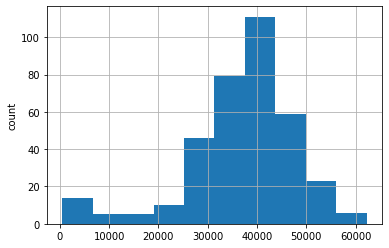

In [46]:
ax_2 = plat_df.Membership_Fee.hist() 
ax_2.set_ylabel("count")

Text(0, 0.5, 'count')

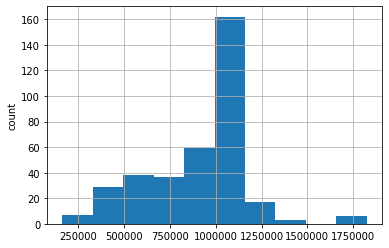

In [71]:
ax_2 = plat_df.Search_AD.hist()
ax_2.set_ylabel("count")

Text(0, 0.5, 'count')

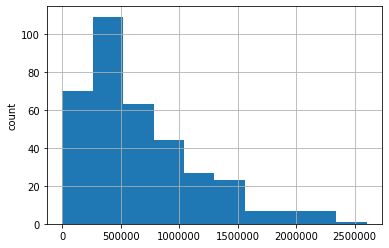

In [48]:
ax_2 = plat_df.Display_AD.hist() 
# used by big
ax_2.set_ylabel("count")

Text(0, 0.5, 'count')

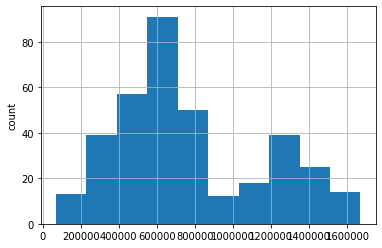

In [49]:
ax_2 = plat_df.Direct_Volumn.hist() 
ax_2.set_ylabel("count")

Text(0, 0.5, 'count')

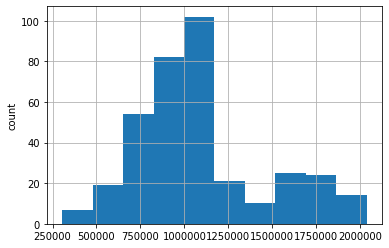

In [50]:
ax_2 = plat_df.Search_Volumn.hist() 
ax_2.set_ylabel("count")

Text(0, 0.5, 'count')

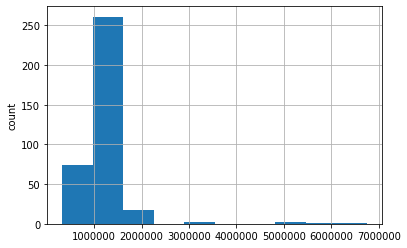

In [51]:
ax_2 = plat_df.Referral_Volumn.hist() 
ax_2.set_ylabel("count")

# analyze vaviables

## Revenue

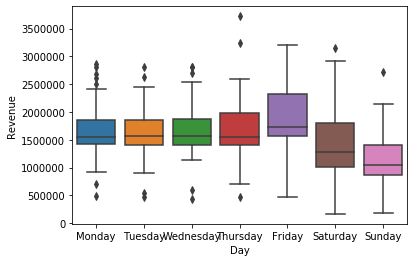

In [67]:
ax = sns.boxplot(x = "Day", y = "Revenue", data = plat_df, order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

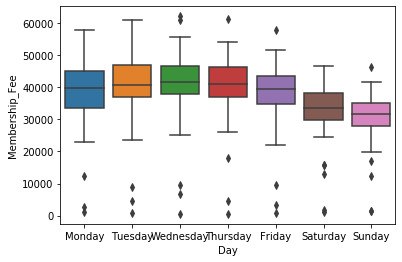

In [68]:
ax = sns.boxplot(x = "Day", y = "Membership_Fee", data = plat_df, order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

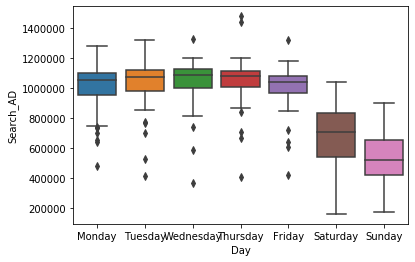

In [69]:
ax = sns.boxplot(x = "Day", y = "Search_AD", data = plat_df, order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

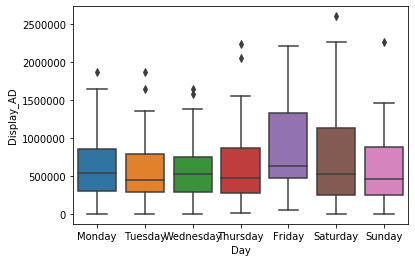

In [70]:
ax = sns.boxplot(x = "Day", y = "Display_AD", data = plat_df, order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

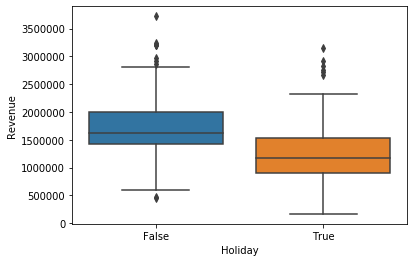

In [53]:
ax = sns.boxplot(x = "Holiday", y = "Revenue", data = plat_df)

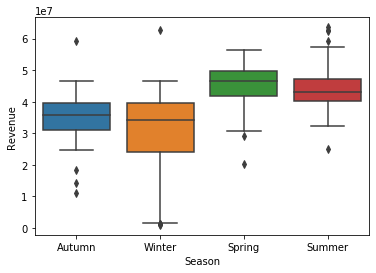

In [53]:
ax = sns.boxplot(x = "Season", y = "Revenue", data = plat_df)

## volumn

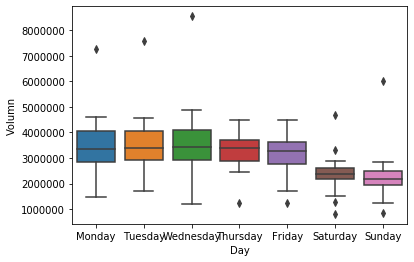

In [72]:
ax = sns.boxplot(x = "Day", y = "Volumn", data = plat_df, order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

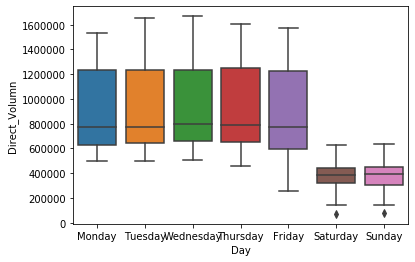

In [73]:
sns.boxplot(x = "Day", y = "Direct_Volumn", data = plat_df, order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

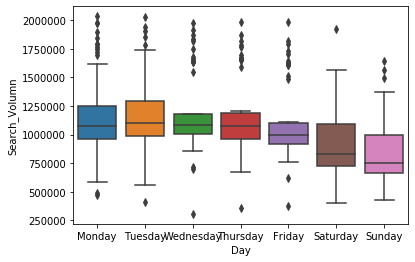

In [74]:
ax2=sns.boxplot(x = "Day", y = "Search_Volumn", data = plat_df, order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

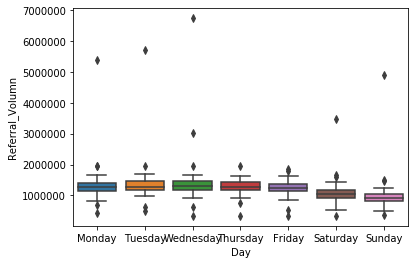

In [75]:
ax3=sns.boxplot(x = "Day", y = "Referral_Volumn", data = plat_df, order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

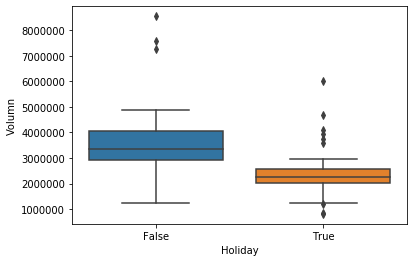

In [54]:
ax = sns.boxplot(x = "Holiday", y = "Volumn", data = plat_df)

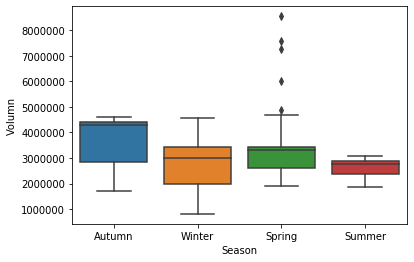

In [54]:
ax = sns.boxplot(x = "Season", y = "Volumn", data = plat_df)

# Correlation

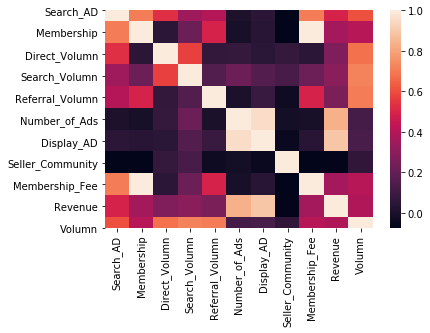

In [76]:
corr = plat_df.corr() 
sns.heatmap(corr)

In [77]:
plat_df.corr().round(3)

,Search_AD,Membership,Direct_Volumn,Search_Volumn,Referral_Volumn,Number_of_Ads,Display_AD,Seller_Community,Membership_Fee,Revenue,Volumn
Search_AD,1.000,0.710,0.534,0.352,0.403,0.007,0.051,-0.074,0.710,0.494,0.606
Membership,0.710,1.000,0.049,0.222,0.493,-0.004,0.041,-0.070,1.000,0.365,0.412
Direct_Volumn,0.534,0.049,1.000,0.574,0.071,0.076,0.044,0.075,0.049,0.273,0.679
Search_Volumn,0.352,0.222,0.574,1.000,0.153,0.221,0.158,0.131,0.222,0.295,0.722
Referral_Volumn,0.403,0.493,0.071,0.153,1.000,0.005,0.089,-0.034,0.493,0.263,0.708
Number_of_Ads,0.007,-0.004,0.076,0.221,0.005,1.000,0.959,-0.018,-0.004,0.837,0.121
Display_AD,0.051,0.041,0.044,0.158,0.089,0.959,1.000,-0.040,0.041,0.893,0.135
Seller_Community,-0.074,-0.070,0.075,0.131,-0.034,-0.018,-0.040,1.000,-0.070,-0.069,0.061
Membership_Fee,0.710,1.000,0.049,0.222,0.493,-0.004,0.041,-0.070,1.000,0.365,0.412
Revenue,0.494,0.365,0.273,0.295,0.263,0.837,0.893,-0.069,0.365,1.000,0.390


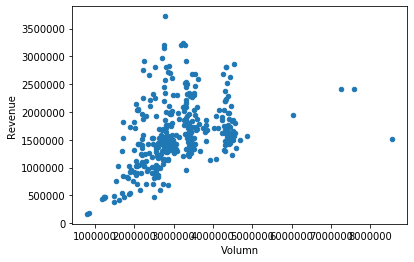

In [78]:
plat_df.plot.scatter(x = "Volumn", y = "Revenue")

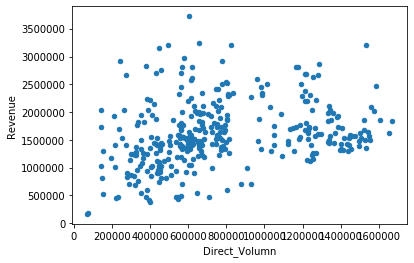

In [79]:
plat_df.plot.scatter(x = "Direct_Volumn", y = "Revenue")

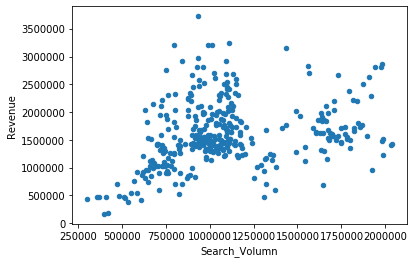

In [80]:
plat_df.plot.scatter(x = "Search_Volumn", y = "Revenue")

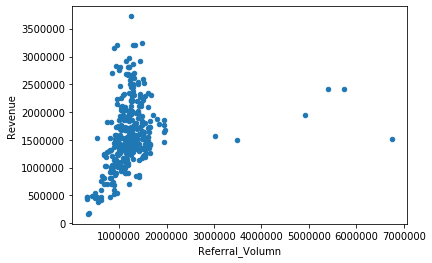

In [81]:
plat_df.plot.scatter(x = "Referral_Volumn", y = "Revenue")

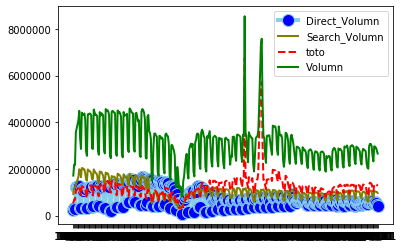

In [82]:
plt.plot( 'Date', 'Direct_Volumn', data=plat_df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'Date', 'Search_Volumn', data=plat_df, marker='', color='olive', linewidth=2)
plt.plot( 'Date', 'Referral_Volumn', data=plat_df, marker='', color='red', linewidth=2, linestyle='dashed', label="toto")
plt.plot( 'Date', 'Volumn', data=plat_df, marker='', color='green', linewidth=2)
plt.legend()


# different state?

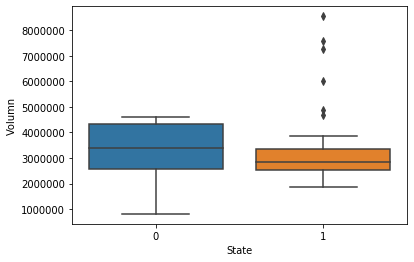

In [83]:
sns.boxplot(x = "State", y = "Volumn", data = plat_df)

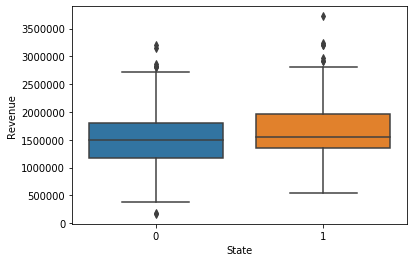

In [84]:
sns.boxplot(x = "State", y = "Revenue", data = plat_df)

# regression

In [85]:
plat_df.head()

,Date,Search_AD,Membership,Direct_Volumn,Search_Volumn,Referral_Volumn,Number_of_Ads,Display_AD,Seller_Community,State,Membership_Fee,Day,Revenue,Volumn
0,10/1/10,611911.04,3164.0,254742.0,925349.0,532800.0,57,910262.0,8621,0,9492.0,Friday,1531665.04,1712891.0
1,10/2/10,304285.14,4367.0,320438.0,1182742.0,683447.0,57,910262.0,160992,0,13101.0,Saturday,1227648.14,2186627.0
2,10/3/10,314934.69,5693.0,298304.0,1201440.0,672891.0,57,910262.0,4256748,0,17079.0,Sunday,1242275.69,2172635.0
3,10/4/10,735275.26,7634.0,1212023.0,1321080.0,1036487.0,57,910262.0,286411,0,22902.0,Monday,1668439.26,3569590.0
4,10/5/10,773972.96,7861.0,1235900.0,1412837.0,1100739.0,57,910262.0,2762952,0,23583.0,Tuesday,1707817.96,3749476.0


In [133]:
predictors = ["Search_AD", "Display_AD", "Membership_Fee","Number_of_Ads", "Seller_Community", "State"]
outcome = "Volumn"
X = plat_df[predictors]
#normalized_X = preprocessing.normalize(X)
y = plat_df[outcome]
print (len(X.columns))
y[:8]

6


0    1712891.0
1    2186627.0
2    2172635.0
3    3569590.0
4    3749476.0
5    3931756.0
6    4085778.0
7    4488159.0
Name: Volumn, dtype: float64

In [134]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.4, random_state =1) 
train_X.shape

(214, 6)

In [118]:
plat_lm = LinearRegression()
plat_lm.fit(train_X, train_y)
print('intercept ', plat_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': plat_lm.coef_})) 
regressionSummary(train_y, plat_lm.predict(train_X))

intercept  453536.55847116094
          Predictor    coefficient
0         Search_AD       2.829553
1        Display_AD      -0.089682
2    Membership_Fee       0.012858
3     Number_of_Ads    5110.204848
4  Seller_Community       0.060920
5             State -972839.981198

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 456942.2045
            Mean Absolute Error (MAE) : 344640.9422
          Mean Percentage Error (MPE) : -1.3395
Mean Absolute Percentage Error (MAPE) : 11.2560


In [131]:
standardized_train_X = preprocessing.scale(train_X)
#standardized_train_y = preprocessing.scale(train_y)
plat_lm_s = LinearRegression()
plat_lm_s.fit(standardized_train_X, standardized_train_y)
print('intercept ', plat_lm_s.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': plat_lm_s.coef_})) 
regressionSummary(standardized_train_y, plat_lm_s.predict(standardized_train_X))
#(beta_coeff, intercept, rvalue, pvalue, stderr) = linregress(zscore(standardized_train_X), zscore(train_y))
#print('The Beta Coeff is: %f' % beta_coeff)

intercept  -5.156343748434543e-17
          Predictor  coefficient
0         Search_AD     0.813808
1        Display_AD    -0.045013
2    Membership_Fee     0.138703
3     Number_of_Ads     0.144904
4  Seller_Community     0.063526
5             State    -0.507524

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 0.4845
            Mean Absolute Error (MAE) : 0.3654
          Mean Percentage Error (MPE) : 317.2846
Mean Absolute Percentage Error (MAPE) : 415.3971


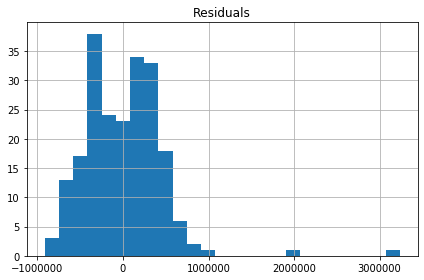

In [112]:
plat_lm_pred = plat_lm.predict(train_X) 
all_residuals = train_y - plat_lm_pred
ax = pd.DataFrame({'Residuals': all_residuals}).hist(bins=25) 
plt.tight_layout()
plt.show()

In [114]:
train_df = train_X.join(train_y)
predictors = train_X.columns
formula = 'Volumn ~ ' + ' + '.join(predictors) 
plat_lm = smf.ols(formula=formula, data=train_df).fit() 
print(plat_lm.summary())
###

                            OLS Regression Results                            
Dep. Variable:                 Volumn   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     112.5
Date:                Sat, 29 Feb 2020   Prob (F-statistic):           2.30e-62
Time:                        20:38:07   Log-Likelihood:                -3092.6
No. Observations:                 214   AIC:                             6199.
Df Residuals:                     207   BIC:                             6223.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4.535e+05   1.43e+05  

## demand side

In [91]:
predictors = ["Direct_Volumn", "Search_Volumn", "Referral_Volumn","Number_of_Ads", "Seller_Community", "State"]
outcome = "Revenue"
X = plat_df[predictors]
y = plat_df[outcome]
print (len(X.columns))
y[:8]

6


0    1531665.04
1    1227648.14
2    1242275.69
3    1668439.26
4    1707817.96
5    1127446.70
6    1152222.88
7    1225988.44
Name: Revenue, dtype: float64

In [92]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.4, random_state =1) 
train_X.shape

(214, 6)

In [93]:
plat_lm = LinearRegression()
plat_lm.fit(train_X, train_y)
print('intercept ', plat_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': plat_lm.coef_})) 

intercept  119294.8830341869
          Predictor    coefficient
0     Direct_Volumn       0.518222
1     Search_Volumn       0.107092
2   Referral_Volumn       0.124967
3     Number_of_Ads   16244.077323
4  Seller_Community      -0.025426
5             State  414245.849824


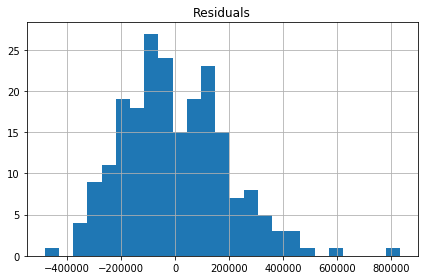

In [94]:
plat_lm_pred = plat_lm.predict(train_X) 
all_residuals = train_y - plat_lm_pred
ax = pd.DataFrame({'Residuals': all_residuals}).hist(bins=25) 
plt.tight_layout()
plt.show()

In [96]:
train_df = train_X.join(train_y)
predictors = train_X.columns
formula = 'Revenue ~ ' + ' + '.join(predictors) 
plat_lm = smf.ols(formula=formula, data=train_df).fit() 
print(plat_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     225.9
Date:                Mon, 24 Feb 2020   Prob (F-statistic):           5.89e-88
Time:                        16:19:31   Log-Likelihood:                -2908.0
No. Observations:                 214   AIC:                             5830.
Df Residuals:                     207   BIC:                             5854.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.193e+05   6.44e+04  

# time series forecasting

In [55]:
plat_df['Date'] = pd.to_datetime(plat_df.Month, format='%d/%m/%Y')

AttributeError: 'DataFrame' object has no attribute 'Month'